Global Power Plant Database
Problem Statement:
Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Key attributes of the database
The database includes the following indicators:

`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
`country_long` (text): longer form of the country designation
`name` (text): name or title of the power plant, generally in Romanized form
`gppd_idnr` (text): 10 or 12 character identifier for the power plant
`capacity_mw` (number): electrical generating capacity in megawatts
`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`primary_fuel` (text): energy source used in primary electricity generation or export
`other_fuel1` (text): energy source used in electricity generation or export
`other_fuel2` (text): energy source used in electricity generation or export
`other_fuel3` (text): energy source used in electricity generation or export
 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
`owner` (text): majority shareholder of the power plant, generally in Romanized form
`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
`url` (text): web document corresponding to the `source` field
`geolocation_source` (text): attribution for geolocation information
`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
`year_of_capacity_data` (number): year the capacity information was reported
`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
`generation_data_source` (text): attribution for the reported generation information
`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 
Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

In [1]:
!pip install imbalanced-learn==0.6.0

In [2]:
#Importing required packages.

import pandas as pd
import numpy as np

#ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


#feature engineering
from sklearn.preprocessing import StandardScaler, LabelEncoder

#train test split and #cross validation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from scipy.stats import zscore

#metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score,mean_squared_error

#ML models
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor


%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')

In [4]:
df.head()

country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   

   latitude  longitude primary_fuel other_fuel1 other_fuel2  ...  \
0   28.1839    73.2407        Solar         NaN         NaN  ...   
1   24.7663    74.6090         Coal         NaN         NaN  ...   
2   21.9038    69.3732         Wind         NaN         NaN  ...   
3   23.8712    91.3602          Gas         NaN         NaN  ...   
4   21.9603    82.4091         Coal         Oil         NaN  ...   

   year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0                    NaN                  NaN                 NaN   
1                    NaN                  NaN                 NaN   
2                    NaN                  NaN                 NaN   
3                 2019.0                  NaN          617.789264   
4                 2019.0                  NaN         3035.550000   

  generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3             843.747          886.004428          663.774500   
4            5916.370         6243.000000         5385.579736   

   generation_gwh_2018  generation_gwh_2019         generation_data_source  \
0                  NaN                  NaN                            NaN   
1                  NaN                  NaN                            NaN   
2                  NaN                  NaN                            NaN   
3           626.239128                  NaN  Central Electricity Authority   
4          7279.000000                  NaN  Central Electricity Authority   

   estimated_generation_gwh  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  

[5 rows x 27 columns]

In [5]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [7]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [8]:
df.describe()

capacity_mw    latitude   longitude  other_fuel3  commissioning_year  \
count   907.000000  861.000000  861.000000          0.0          527.000000   
mean    326.223755   21.197918   77.464907          NaN         1997.091082   
std     590.085456    6.239612    4.939316          NaN           17.082868   
min       0.000000    8.168900   68.644700          NaN         1927.000000   
25%      16.725000   16.773900   74.256200          NaN         1988.000000   
50%      59.200000   21.780000   76.719500          NaN         2001.000000   
75%     385.250000   25.512400   79.440800          NaN         2012.000000   
max    4760.000000   34.649000   95.408000          NaN         2018.000000   

       wepp_id  year_of_capacity_data  generation_gwh_2013  \
count      0.0                  519.0                  0.0   
mean       NaN                 2019.0                  NaN   
std        NaN                    0.0                  NaN   
min        NaN                 2019.0                  NaN   
25%        NaN                 2019.0                  NaN   
50%        NaN                 2019.0                  NaN   
75%        NaN                 2019.0                  NaN   
max        NaN                 2019.0                  NaN   

       generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
count           398.000000           422.000000           434.000000   
mean           2431.823590          2428.226946          2467.936859   
std            4026.440035          4194.596959          4162.884308   
min               0.000000             0.000000             0.000000   
25%             223.557672           176.381063           188.285252   
50%             801.123775           711.181225           737.205450   
75%            3035.306250          3084.121250          3282.861313   
max           28127.000000         30539.000000         30015.000000   

       generation_gwh_2017  generation_gwh_2018  generation_gwh_2019  \
count           440.000000           448.000000                  0.0   
mean           2547.759305          2600.804099                  NaN   
std            4196.991169          4314.880456                  NaN   
min               0.000000             0.000000                  NaN   
25%             177.874930           193.378250                  NaN   
50%             817.977250           751.644375                  NaN   
75%            3275.690475          3143.535900                  NaN   
max           35116.000000         35136.000000                  NaN   

       estimated_generation_gwh  
count                       0.0  
mean                        NaN  
std                         NaN  
min                         NaN  
25%                         NaN  
50%                         NaN  
75%                         NaN  
max                         NaN

#### very much null values are present in this data set..some column has only null value are present, it means it useless for us.so  firstly drop this column..

In [9]:
data = df.drop(['estimated_generation_gwh','generation_gwh_2019','other_fuel3','wepp_id','generation_gwh_2013','other_fuel2'],axis=1,inplace=True)


In [10]:
df.head(6)

country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   
5     IND        India              AKRIMOTA LIG  IND0000003        250.0   

   latitude  longitude primary_fuel other_fuel1  commissioning_year  ...  \
0   28.1839    73.2407        Solar         NaN              2011.0  ...   
1   24.7663    74.6090         Coal         NaN                 NaN  ...   
2   21.9038    69.3732         Wind         NaN                 NaN  ...   
3   23.8712    91.3602          Gas         NaN              2004.0  ...   
4   21.9603    82.4091         Coal         Oil              2015.0  ...   
5   23.7689    68.6447         Coal         Oil              2005.0  ...   

                                 source  \
0  National Renewable Energy Laboratory   
1                  Ultratech Cement ltd   
2                                   CDM   
3         Central Electricity Authority   
4         Central Electricity Authority   
5         Central Electricity Authority   

                                                 url  \
0  http://www.nrel.gov/csp/solarpaces/project_det...   
1                    http://www.ultratechcement.com/   
2  https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...   
3                             http://www.cea.nic.in/   
4                             http://www.cea.nic.in/   
5                             http://www.cea.nic.in/   

                     geolocation_source year_of_capacity_data  \
0  National Renewable Energy Laboratory                   NaN   
1                                   WRI                   NaN   
2                                   WRI                   NaN   
3                                   WRI                2019.0   
4                                   WRI                2019.0   
5                                   WRI                2019.0   

   generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3           617.789264              843.747           886.004428   
4          3035.550000             5916.370          6243.000000   
5          1153.421000             1208.852          1175.765000   

   generation_gwh_2017  generation_gwh_2018         generation_data_source  
0                  NaN                  NaN                            NaN  
1                  NaN                  NaN                            NaN  
2                  NaN                  NaN                            NaN  
3           663.774500           626.239128  Central Electricity Authority  
4          5385.579736          7279.000000  Central Electricity Authority  
5          1147.913000           976.655000  Central Electricity Authority  

[6 rows x 21 columns]

In [11]:
df.shape

(907, 21)

firstly fill the null values in all column.

In [12]:
# these are catgorical data fill missing values with mode method
df['other_fuel1']=df['other_fuel1'].fillna(df['other_fuel1'].mode()[0])
df['geolocation_source']=df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])
df['generation_data_source']=df['generation_data_source'].fillna(df['generation_data_source'].mode()[0])
df['owner']=df['owner'].fillna(df['owner'].mode()[0])

In [13]:
# these are continous data fill by "mean" value
columns_with_nan = ['year_of_capacity_data','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018',
                   'commissioning_year','latitude','longitude']

In [14]:
for col in columns_with_nan:
    df[col].fillna(df[col].mean(), inplace=True)

In [15]:
df.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

#### all nan value remove..now no null value are present

In [16]:
df.shape

(907, 21)

In [17]:
df.head(8)

country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   
5     IND        India              AKRIMOTA LIG  IND0000003        250.0   
6     IND        India                    ALIYAR  IND0000004         60.0   
7     IND        India           ALLAIN DUHANGAN  IND0000005        192.0   

   latitude  longitude primary_fuel other_fuel1  commissioning_year  ...  \
0   28.1839    73.2407        Solar         Oil         2011.000000  ...   
1   24.7663    74.6090         Coal         Oil         1997.091082  ...   
2   21.9038    69.3732         Wind         Oil         1997.091082  ...   
3   23.8712    91.3602          Gas         Oil         2004.000000  ...   
4   21.9603    82.4091         Coal         Oil         2015.000000  ...   
5   23.7689    68.6447         Coal         Oil         2005.000000  ...   
6   10.4547    77.0078        Hydro         Oil         1970.000000  ...   
7   32.2258    77.2070        Hydro         Oil         2010.000000  ...   

                                 source  \
0  National Renewable Energy Laboratory   
1                  Ultratech Cement ltd   
2                                   CDM   
3         Central Electricity Authority   
4         Central Electricity Authority   
5         Central Electricity Authority   
6         Central Electricity Authority   
7         Central Electricity Authority   

                                                 url  \
0  http://www.nrel.gov/csp/solarpaces/project_det...   
1                    http://www.ultratechcement.com/   
2  https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...   
3                             http://www.cea.nic.in/   
4                             http://www.cea.nic.in/   
5                             http://www.cea.nic.in/   
6                             http://www.cea.nic.in/   
7                             http://www.cea.nic.in/   

                     geolocation_source year_of_capacity_data  \
0  National Renewable Energy Laboratory                2019.0   
1                                   WRI                2019.0   
2                                   WRI                2019.0   
3                                   WRI                2019.0   
4                                   WRI                2019.0   
5                                   WRI                2019.0   
6                                   WRI                2019.0   
7                                   WRI                2019.0   

   generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0          2431.823590          2428.226946          2467.936859   
1          2431.823590          2428.226946          2467.936859   
2          2431.823590          2428.226946          2467.936859   
3           617.789264           843.747000           886.004428   
4          3035.550000          5916.370000          6243.000000   
5          1153.421000          1208.852000          1175.765000   
6           157.558250           152.195200            61.421350   
7           674.391100           721.335200           675.724400   

   generation_gwh_2017  generation_gwh_2018         generation_data_source  
0          2547.759305          2600.804099  Central Electricity Authority  
1          2547.759305          2600.804099  Central Electricity Authority  
2          2547.759305          2600.804099  Central Electricity Authority  
3           663.774500           626.239128  Central Electricity Authority  
4          5385.579736          7279.000000  Central Electricity Authority  
5          1147.913000           976.655000  Central Electricity Auth

In [18]:
df.nunique()

country                     1
country_long                1
name                      907
gppd_idnr                 907
capacity_mw               361
latitude                  837
longitude                 828
primary_fuel                8
other_fuel1                 3
commissioning_year         74
owner                     280
source                    191
url                       304
geolocation_source          3
year_of_capacity_data       1
generation_gwh_2014       372
generation_gwh_2015       397
generation_gwh_2016       404
generation_gwh_2017       409
generation_gwh_2018       411
generation_data_source      1
dtype: int64

### which have <20 unique value is known as catgorical data..here only 8 column are catgorical..

## When target is Primary fuel

In [19]:
X1=df[['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'other_fuel1', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source',  'year_of_capacity_data'
       , 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
        'generation_data_source']].copy()

In [20]:
X1.head()

country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   

   latitude  longitude other_fuel1  commissioning_year                 owner  \
0   28.1839    73.2407         Oil         2011.000000           Solar Paces   
1   24.7663    74.6090         Oil         1997.091082  Ultratech Cement ltd   
2   21.9038    69.3732         Oil         1997.091082                   AES   
3   23.8712    91.3602         Oil         2004.000000           Acc Acc ltd   
4   21.9603    82.4091         Oil         2015.000000           Acc Acc ltd   

                                 source  \
0  National Renewable Energy Laboratory   
1                  Ultratech Cement ltd   
2                                   CDM   
3         Central Electricity Authority   
4         Central Electricity Authority   

                                                 url  \
0  http://www.nrel.gov/csp/solarpaces/project_det...   
1                    http://www.ultratechcement.com/   
2  https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...   
3                             http://www.cea.nic.in/   
4                             http://www.cea.nic.in/   

                     geolocation_source  year_of_capacity_data  \
0  National Renewable Energy Laboratory                 2019.0   
1                                   WRI                 2019.0   
2                                   WRI                 2019.0   
3                                   WRI                 2019.0   
4                                   WRI                 2019.0   

   generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0          2431.823590          2428.226946          2467.936859   
1          2431.823590          2428.226946          2467.936859   
2          2431.823590          2428.226946          2467.936859   
3           617.789264           843.747000           886.004428   
4          3035.550000          5916.370000          6243.000000   

   generation_gwh_2017  generation_gwh_2018         generation_data_source  
0          2547.759305          2600.804099  Central Electricity Authority  
1          2547.759305          2600.804099  Central Electricity Authority  
2          2547.759305          2600.804099  Central Electricity Authority  
3           663.774500           626.239128  Central Electricity Authority  
4          5385.579736          7279.000000  Central Electricity Authority

In [21]:
Y1 = df[['primary_fuel']].copy()

In [22]:
Y1

primary_fuel
0          Solar
1           Coal
2           Wind
3            Gas
4           Coal
..           ...
902         Coal
903        Solar
904         Wind
905         Coal
906         Wind

[907 rows x 1 columns]

## when target is capacity MW

In [23]:
X2 = df[['country', 'country_long', 'name', 'gppd_idnr', 'primary_fuel',
       'latitude', 'longitude', 'other_fuel1', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source',  'year_of_capacity_data'
       , 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
        'generation_data_source']].copy()

In [24]:
X2.head(3)

country country_long                      name   gppd_idnr primary_fuel  \
0     IND        India          ACME Solar Tower  WRI1020239        Solar   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         Coal   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         Wind   

   latitude  longitude other_fuel1  commissioning_year                 owner  \
0   28.1839    73.2407         Oil         2011.000000           Solar Paces   
1   24.7663    74.6090         Oil         1997.091082  Ultratech Cement ltd   
2   21.9038    69.3732         Oil         1997.091082                   AES   

                                 source  \
0  National Renewable Energy Laboratory   
1                  Ultratech Cement ltd   
2                                   CDM   

                                                 url  \
0  http://www.nrel.gov/csp/solarpaces/project_det...   
1                    http://www.ultratechcement.com/   
2  https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...   

                     geolocation_source  year_of_capacity_data  \
0  National Renewable Energy Laboratory                 2019.0   
1                                   WRI                 2019.0   
2                                   WRI                 2019.0   

   generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0           2431.82359          2428.226946          2467.936859   
1           2431.82359          2428.226946          2467.936859   
2           2431.82359          2428.226946          2467.936859   

   generation_gwh_2017  generation_gwh_2018         generation_data_source  
0          2547.759305          2600.804099  Central Electricity Authority  
1          2547.759305          2600.804099  Central Electricity Authority  
2          2547.759305          2600.804099  Central Electricity Authority

In [25]:
Y2 = df[['capacity_mw']].copy()

In [26]:
Y2

capacity_mw
0            2.5
1           98.0
2           39.2
3          135.0
4         1800.0
..           ...
902       1600.0
903          3.0
904         25.5
905         80.0
906         16.5

[907 rows x 1 columns]

# EDA(Preprocessing)

### apply the Encoding technique

In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [28]:
Y1['primary_fuel']= label_encoder.fit_transform(Y1['primary_fuel'])

## here our target variable is "Primary fuel".so firstly i build the classification model..

In [29]:
Y1.head(3)

primary_fuel
0             6
1             1
2             7

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

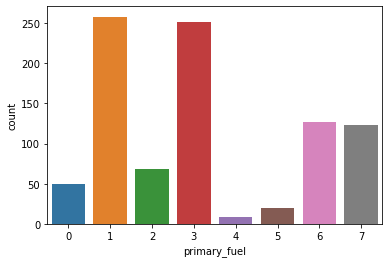

In [30]:
# checking for class imbalance
sns.countplot(Y1['primary_fuel'])

In [31]:
#  Class 1,3 carry the most of values and 0,2,7,4,5,6 carry minimum values.

In [32]:
Y1['primary_fuel'] = np.where((Y1['primary_fuel'] <=3),0,1)
Y1['primary_fuel'].unique()

array([1, 0])

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

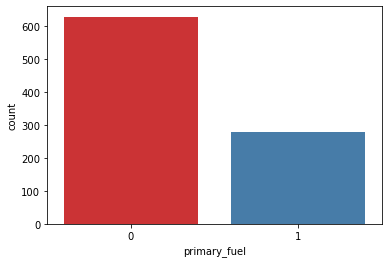

In [33]:
sns.countplot(Y1['primary_fuel'], palette="Set1")

#### let's see the how data  data is distributed in every column

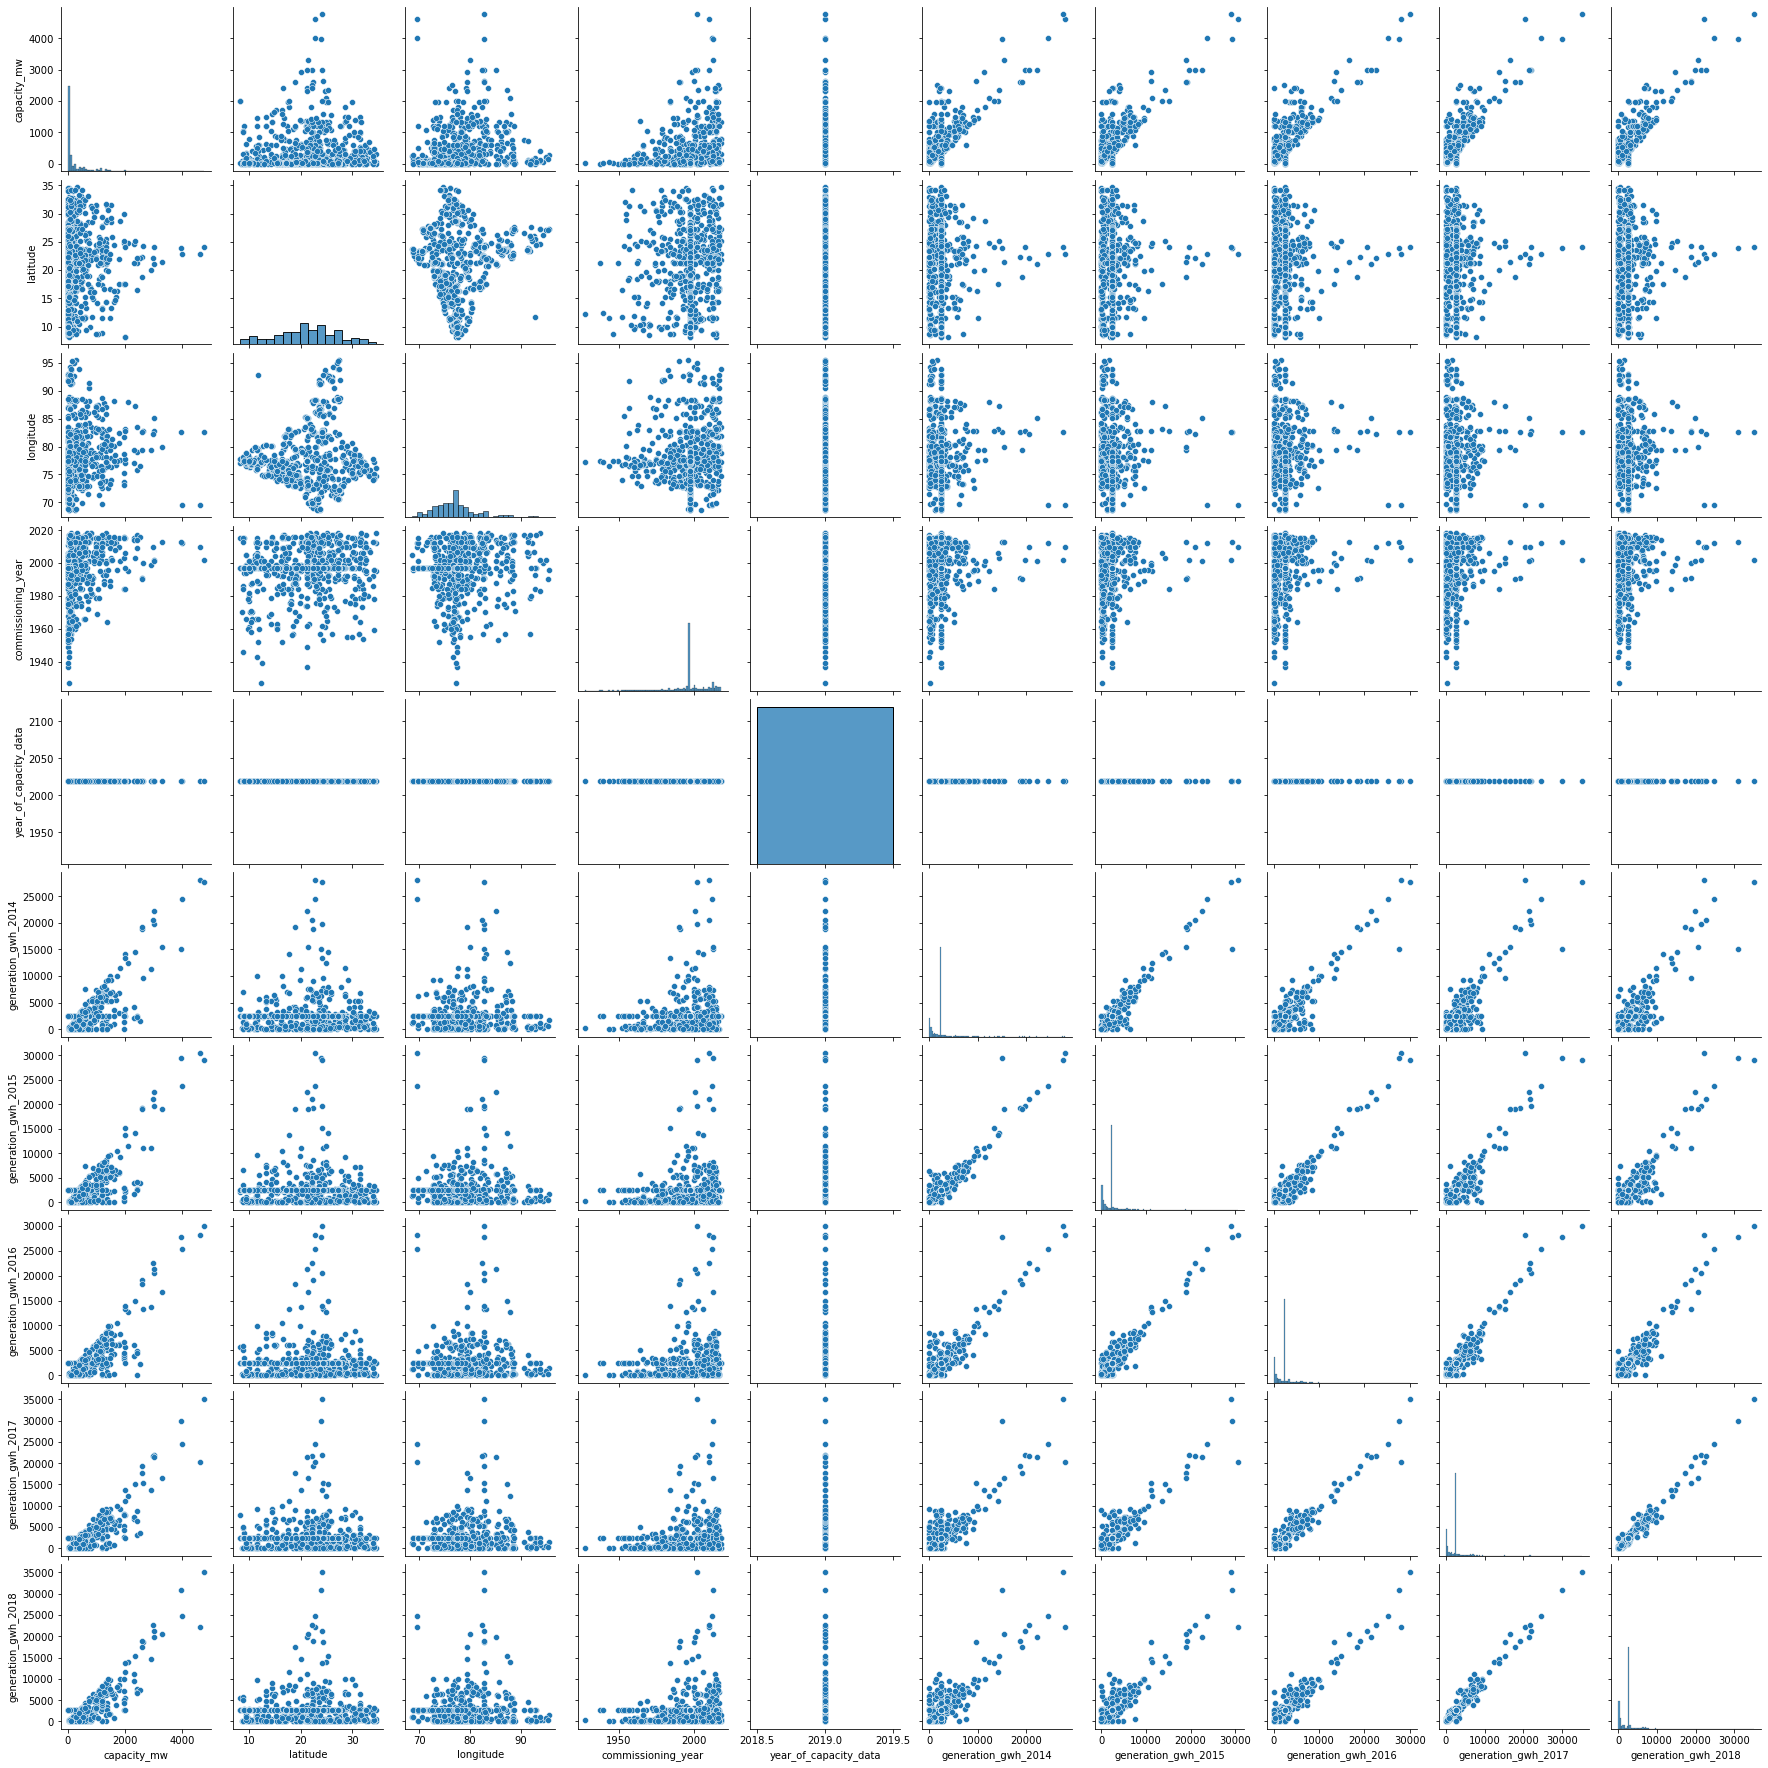

In [34]:
sns.pairplot(X1)
plt.show()

## Data Visualization

### Correlation

<AxesSubplot:xlabel='other_fuel1', ylabel='count'>

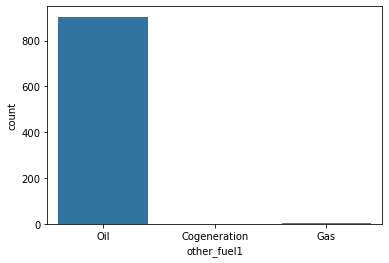

In [35]:
sns.countplot(x='other_fuel1',data=X1)

### in other fuel column only oil is correlated with primary fuel..

<AxesSubplot:xlabel='owner', ylabel='count'>

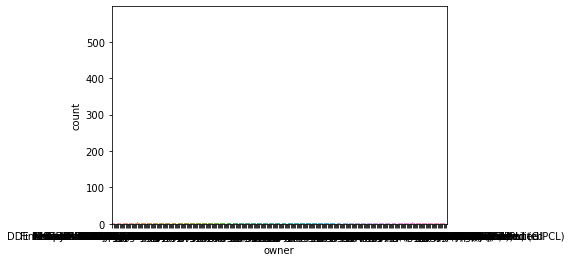

In [36]:
sns.countplot(x='owner',data=X1)

<AxesSubplot:xlabel='source', ylabel='count'>

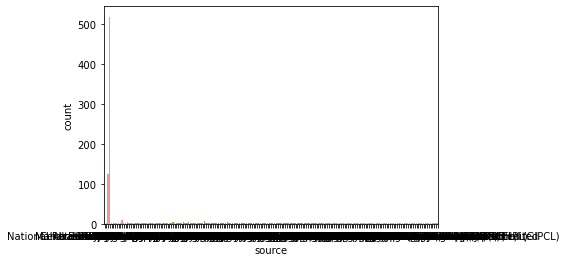

In [37]:
sns.countplot(x='source',data=X1)

#### owner and source both are not realted to primary fuel

<AxesSubplot:xlabel='geolocation_source', ylabel='count'>

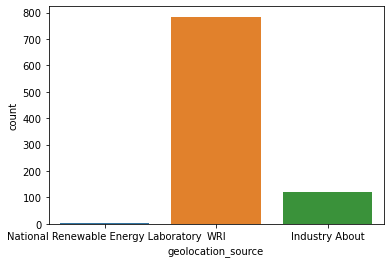

In [38]:
sns.countplot(x='geolocation_source',data=X1)

#### only WRI source get highest primary fuel compare to Industry about

<AxesSubplot:xlabel='url', ylabel='count'>

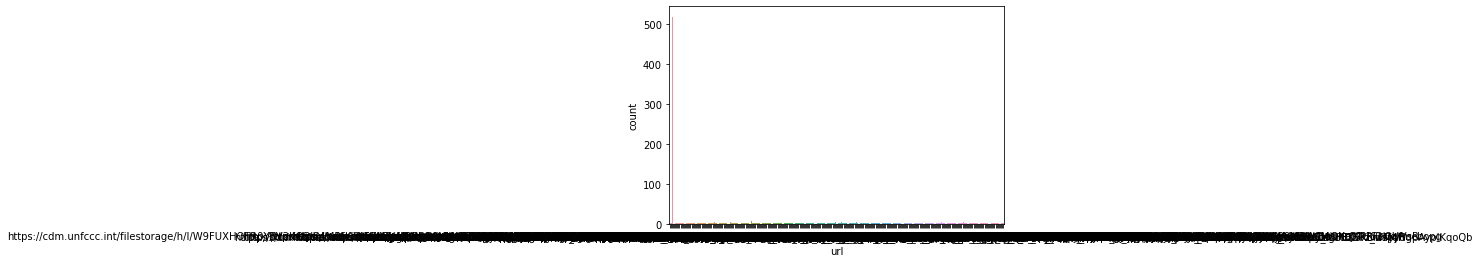

In [39]:
sns.countplot(x='url',data=X1)

#### here "url" not showing clear data..

<AxesSubplot:xlabel='generation_data_source', ylabel='count'>

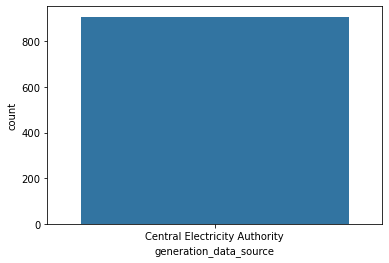

In [40]:
sns.countplot(x='generation_data_source',data=X1)

#### now we can see only 1 data are present in this column..

In [41]:
# Checking the counts of label categories
fuel = Y1['primary_fuel'].value_counts(normalize=True)
round(fuel * 100, 2).astype('str') + ' %'

0    69.24 %
1    30.76 %
Name: primary_fuel, dtype: object

#### here showing data is imbalance,data should be balance

### apply the Encoding technique for other column

In [42]:
for col in X1.columns:
    if X1[col].dtypes == 'object':
        encoder = LabelEncoder()
        X1[col] = encoder.fit_transform(X1[col])

In [43]:
X1.head(2)

country  country_long  name  gppd_idnr  capacity_mw  latitude  longitude  \
0        0             0     0        657          2.5   28.1839    73.2407   
1        0             0     1        519         98.0   24.7663    74.6090   

   other_fuel1  commissioning_year  owner  source  url  geolocation_source  \
0            2         2011.000000    229     109  128                   1   
1            2         1997.091082    258     174  173                   2   

   year_of_capacity_data  generation_gwh_2014  generation_gwh_2015  \
0                 2019.0           2431.82359          2428.226946   
1                 2019.0           2431.82359          2428.226946   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0          2467.936859          2547.759305          2600.804099   
1          2467.936859          2547.759305          2600.804099   

   generation_data_source  
0                       0  
1                       0

## Correlation

In [44]:
X1.corrwith(Y1['primary_fuel']).sort_values()

geolocation_source       -0.591480
longitude                -0.394512
capacity_mw              -0.298093
latitude                 -0.038738
other_fuel1              -0.022638
generation_gwh_2018      -0.011985
generation_gwh_2016      -0.010513
generation_gwh_2015      -0.010047
generation_gwh_2014      -0.007408
generation_gwh_2017      -0.002968
commissioning_year        0.014223
name                      0.020192
source                    0.240434
owner                     0.434991
url                       0.598793
gppd_idnr                 0.727192
country                        NaN
country_long                   NaN
year_of_capacity_data          NaN
generation_data_source         NaN
dtype: float64

### when trget variable is "Primary fuel"  , some columns show null realationship with trget.  so no need to proceed further with this column. firstly we should  drop this column..

In [45]:
data = X1.drop(['year_of_capacity_data','country','country_long','generation_data_source'],axis=1,inplace=True)

## HeatMap

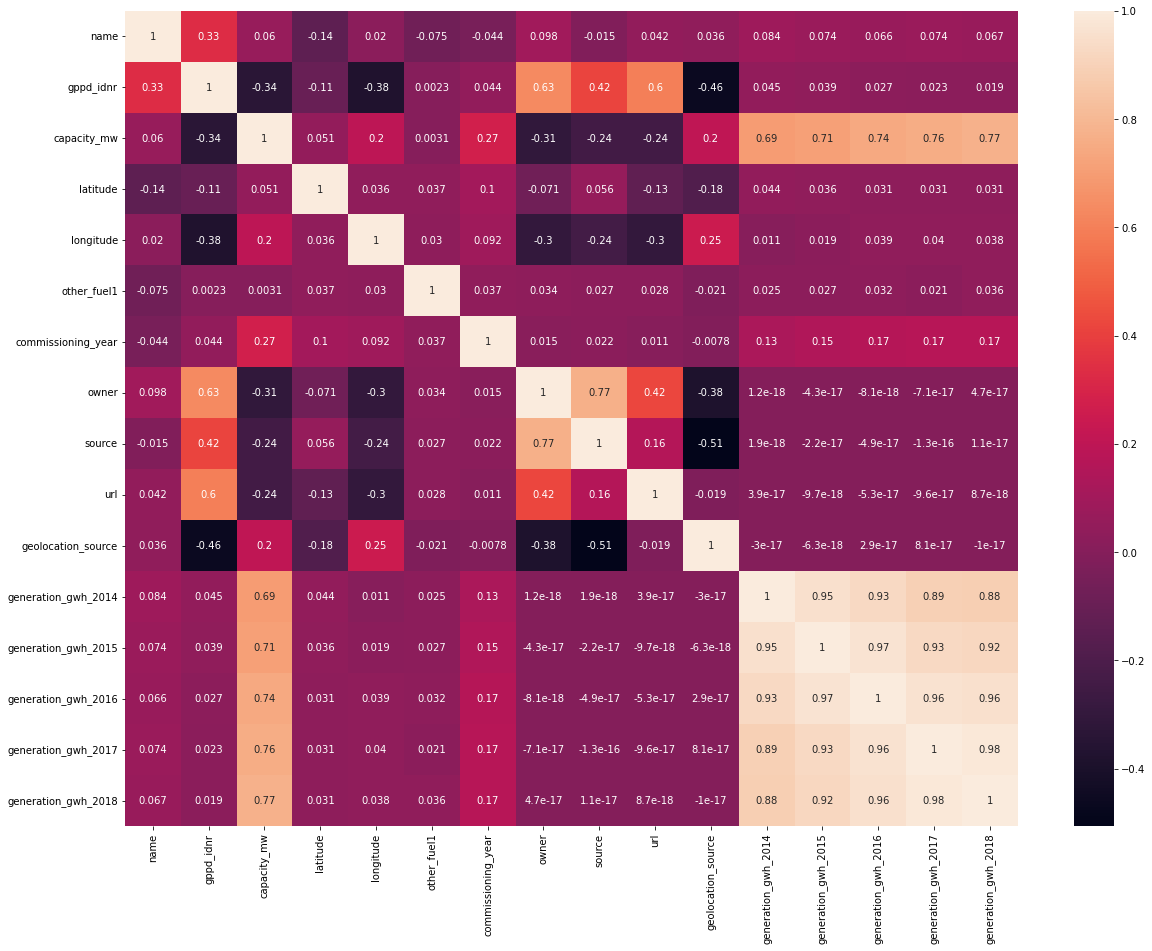

In [46]:
# plotting heat map
plt.figure(figsize = (20,15))
sns.heatmap(X1.corr(),annot = True)
plt.show()

### here some independent variable are highly correlated to each other , we should apply the VIF and PCA technique.

### gdpd idnr,url,owner,source,capacity mw, longtitue, geolocation source are correlated to target variable.but country,country long, genertion data  source not related to target. drop this column.

In [47]:
data = X1.drop(['latitude','commissioning_year','other_fuel1','name'],axis=1,inplace=True)

In [48]:
# Checking relationship between Dependent and Independent variables
x = Y1.drop(columns = ['primary_fuel'])
y = Y1['primary_fuel']

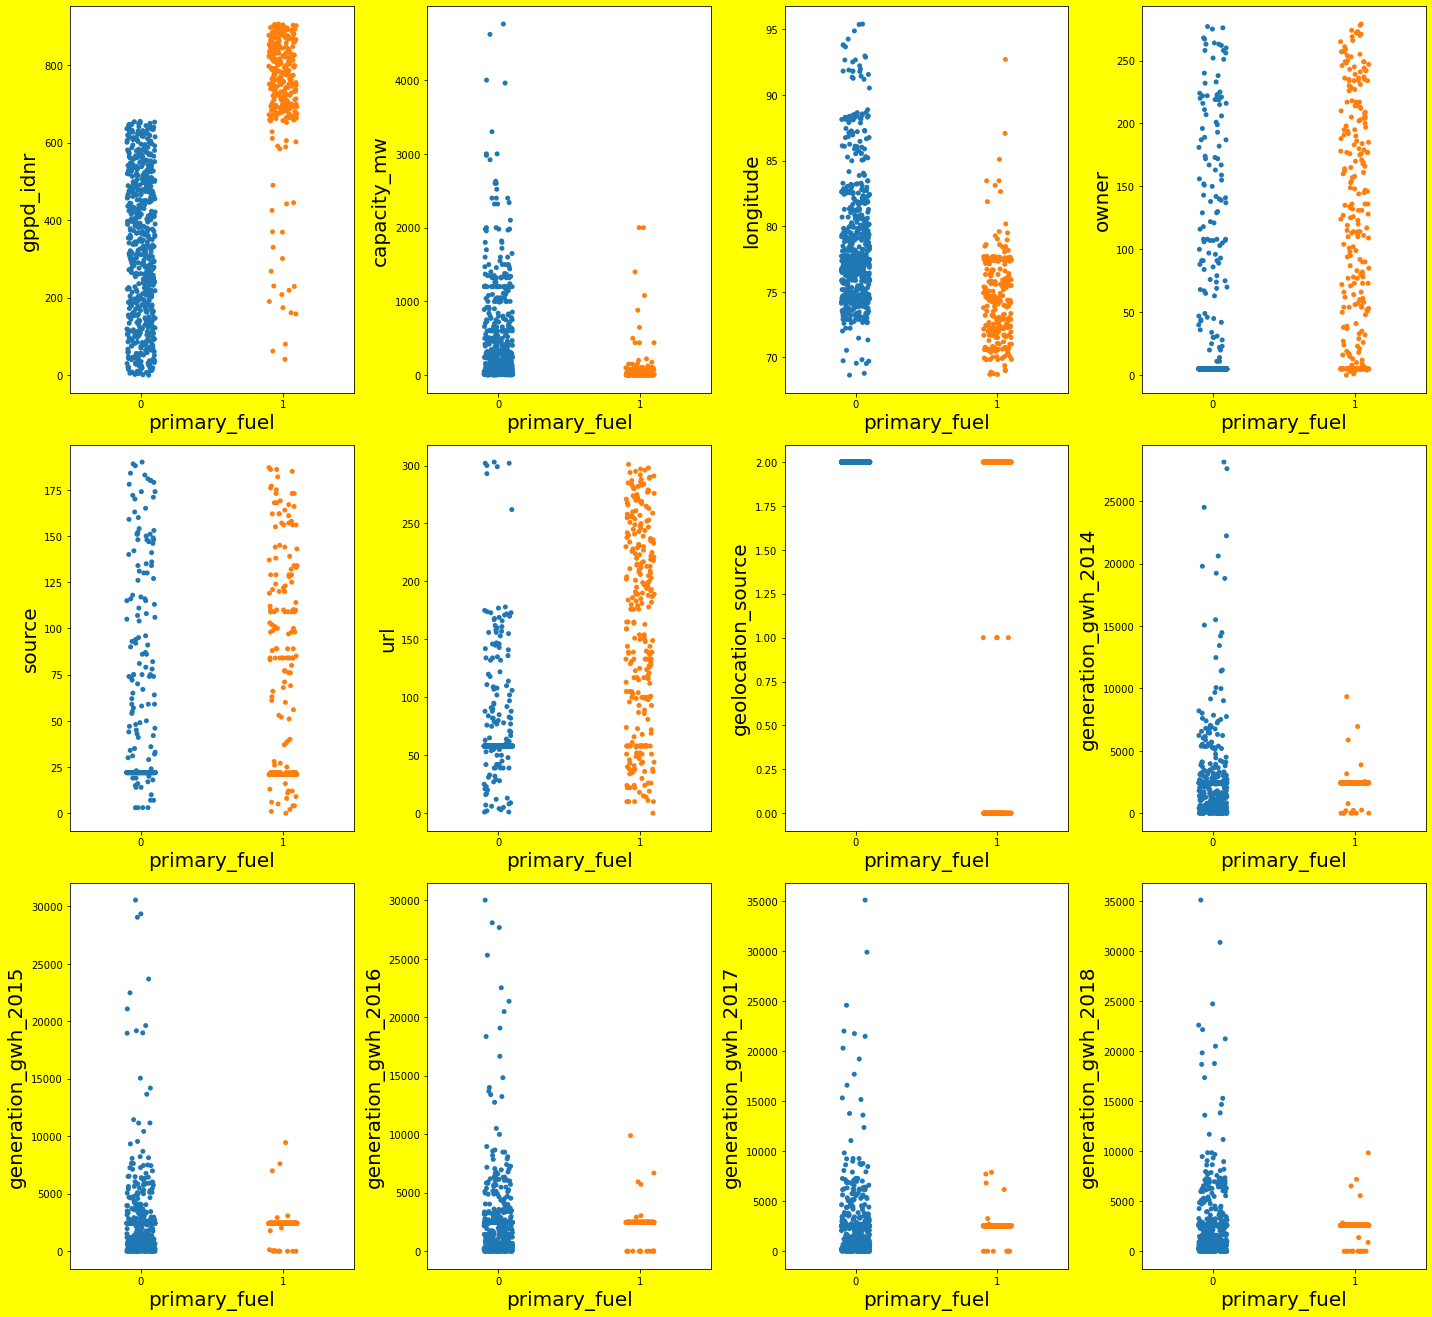

In [49]:
#interpreting relationship between independent variables and dependent class
plt.figure(figsize = (20,30), facecolor = 'yellow')
plotnum = 1

y = Y1['primary_fuel']
for col in X1:
    if plotnum<=17:
        plt.subplot(5,4,plotnum)
        sns.stripplot(y,X1[col])
        plt.xlabel('primary_fuel',fontsize = 20)
        plt.ylabel(col, fontsize = 20)
    plotnum+=1
plt.tight_layout()

## Check for Outliers and skewness

In [50]:
X1.skew()

gppd_idnr              0.000000
capacity_mw            3.123576
longitude              1.141881
owner                  1.364406
source                 1.827373
url                    1.510537
geolocation_source    -2.159841
generation_gwh_2014    5.035446
generation_gwh_2015    5.364134
generation_gwh_2016    5.068427
generation_gwh_2017    5.110952
generation_gwh_2018    4.937907
dtype: float64

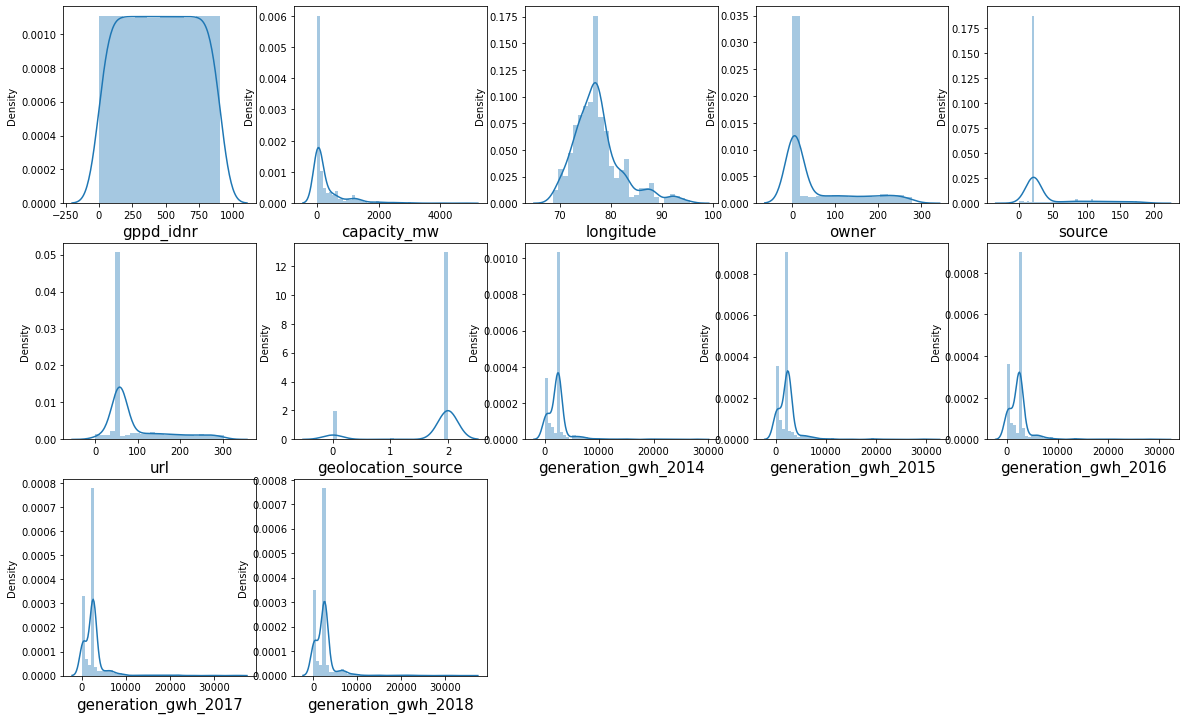

In [51]:
# Visualising data distribution for every column
plt.figure(figsize =(20,21),facecolor ='white')
plotnum = 1

for col in X1:
    if plotnum<=18:
        plt.subplot(5,5,plotnum)
        sns.distplot(X1[col])
        plt.xlabel(col,fontsize = 15)
    plotnum+=1
plt.show()

#### here highly skeweed data are present in both type (object and float)...remove the skewness..

## box plot

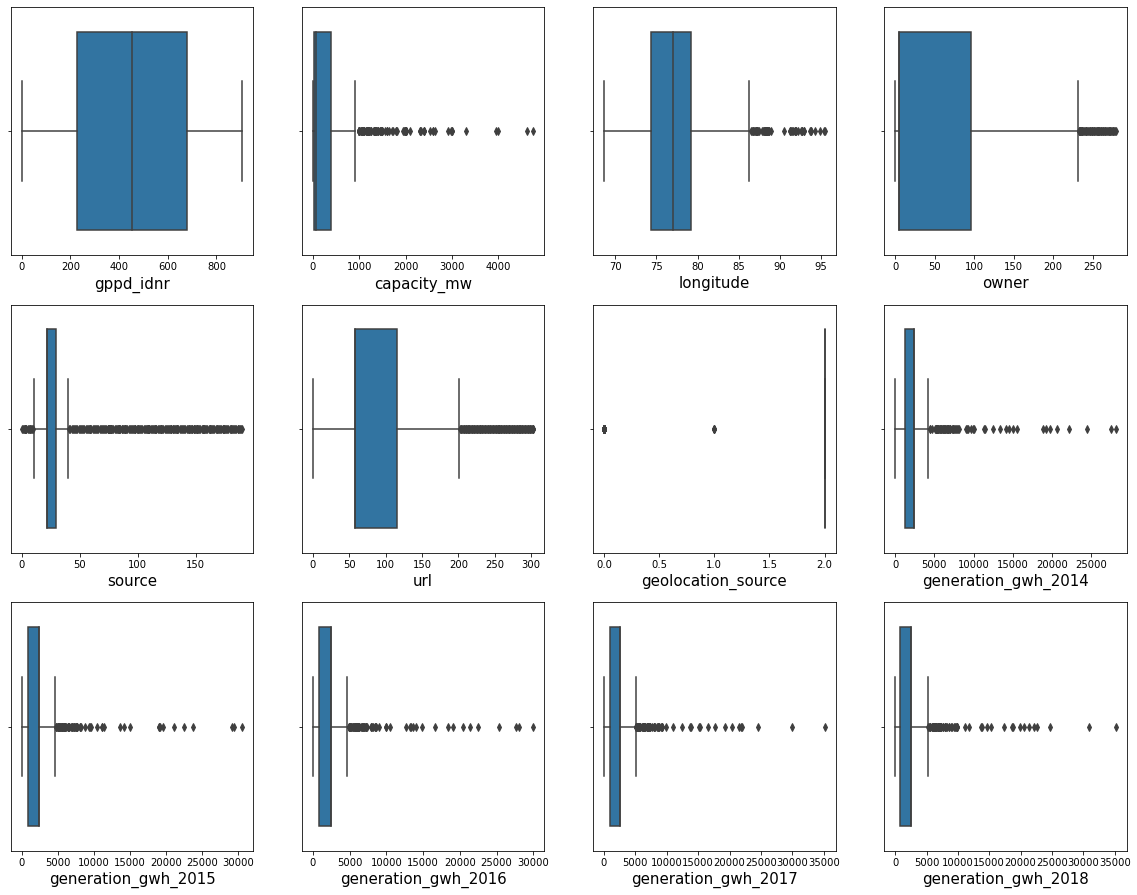

In [52]:
# Visualising data distribution for every column
plt.figure(figsize =(20,21),facecolor ='white')
plotnum = 1

for col in X1:
    if plotnum<=13:
        plt.subplot(4,4,plotnum)
        sns.boxplot(X1[col])
        plt.xlabel(col,fontsize = 15)
    plotnum+=1
plt.show()

#### here outliers are present in many columns,if  primary fuel has outliers , it does not remove.i have some outliers are present in continous column and some are catogorical column.but you don't remove from catogorical column..

## Data Preprocessing

### Fixing imbalanced dataset using Oversampling

In [53]:
from sklearn.ensemble import ExtraTreesClassifier
selector = ExtraTreesClassifier(random_state=42)

In [54]:
selector.fit(X1, y)

ExtraTreesClassifier(random_state=42)

In [55]:
feature_imp = selector.feature_importances_

In [56]:
for index, val in enumerate(feature_imp):
    print(index, round((val * 100), 2))

0 28.8
1 3.47
2 5.49
3 6.21
4 5.4
5 19.81
6 22.14
7 1.56
8 1.22
9 1.7
10 2.33
11 1.88


In [57]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gppd_idnr            907 non-null    int32  
 1   capacity_mw          907 non-null    float64
 2   longitude            907 non-null    float64
 3   owner                907 non-null    int32  
 4   source               907 non-null    int32  
 5   url                  907 non-null    int32  
 6   geolocation_source   907 non-null    int32  
 7   generation_gwh_2014  907 non-null    float64
 8   generation_gwh_2015  907 non-null    float64
 9   generation_gwh_2016  907 non-null    float64
 10  generation_gwh_2017  907 non-null    float64
 11  generation_gwh_2018  907 non-null    float64
dtypes: float64(7), int32(5)
memory usage: 67.4 KB


### Fixing imbalanced dataset using Oversampling

In [58]:
round(y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    69.24 %
1    30.76 %
Name: primary_fuel, dtype: object

In [59]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)

In [60]:
ros.fit(X1, y)

RandomOverSampler(random_state=42)

In [61]:
X1_resampled, y_resampled = ros.fit_resample(X1, y)

In [62]:
round(y_resampled.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

1    50.0 %
0    50.0 %
Name: primary_fuel, dtype: object

### Remove outliers

## Z score method to remove outliers

In [63]:
features =['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','capacity_mw','longitude']

In [64]:
w= X1.copy()

from scipy.stats import zscore

zscor = zscore(w)
zabs = np.abs(zscor)
df = w[(zabs <3).all(axis=1)] #taking threshold value as 3
print(df.shape)

print(w.shape)

(853, 12)
(907, 12)


In [65]:
X1.skew()

gppd_idnr              0.000000
capacity_mw            3.123576
longitude              1.141881
owner                  1.364406
source                 1.827373
url                    1.510537
geolocation_source    -2.159841
generation_gwh_2014    5.035446
generation_gwh_2015    5.364134
generation_gwh_2016    5.068427
generation_gwh_2017    5.110952
generation_gwh_2018    4.937907
dtype: float64

In [66]:
df.skew()

gppd_idnr             -0.020817
capacity_mw            1.987696
longitude              0.923789
owner                  1.356182
source                 1.820715
url                    1.467358
geolocation_source    -2.142195
generation_gwh_2014    1.508057
generation_gwh_2015    1.380801
generation_gwh_2016    1.404456
generation_gwh_2017    1.273349
generation_gwh_2018    1.312489
dtype: float64

In [67]:
# Reducing the skewness further
X1 = df.copy()
feat = ['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','capacity_mw','longitude']

skewdf = X1[feat].copy()

#Trying log transform method

for col in skewdf:
    skewdf[col] = np.log(skewdf[col])
skewdf.skew()

generation_gwh_2014         NaN
generation_gwh_2015         NaN
generation_gwh_2016         NaN
generation_gwh_2017         NaN
generation_gwh_2018         NaN
capacity_mw                 NaN
longitude              0.737189
dtype: float64

In [68]:
# Trying power transform method

from sklearn.preprocessing import PowerTransformer

powtrans = PowerTransformer(method = 'yeo-johnson', standardize = True)
df1 = X1[feat].copy()
df1.skew()

generation_gwh_2014    1.508057
generation_gwh_2015    1.380801
generation_gwh_2016    1.404456
generation_gwh_2017    1.273349
generation_gwh_2018    1.312489
capacity_mw            1.987696
longitude              0.923789
dtype: float64

In [69]:
transformed = powtrans.fit_transform(df1)

transformed = pd.DataFrame(transformed, columns =df1.columns)
transformed.skew()

generation_gwh_2014   -0.258835
generation_gwh_2015   -0.316122
generation_gwh_2016   -0.317343
generation_gwh_2017   -0.347473
generation_gwh_2018   -0.356452
capacity_mw            0.014746
longitude             -0.002124
dtype: float64

In [70]:
skewdf.skew()

generation_gwh_2014         NaN
generation_gwh_2015         NaN
generation_gwh_2016         NaN
generation_gwh_2017         NaN
generation_gwh_2018         NaN
capacity_mw                 NaN
longitude              0.737189
dtype: float64

#### Comparing outputs of Log Transformer and Power Transformer method, it is determined that Power Transformer gives better result.

In [71]:
transformed.index = X1.index
X1[feat] = transformed[feat]
x = Y1.drop(columns = ['primary_fuel'])
y = Y1['primary_fuel']
X1.skew()

gppd_idnr             -0.020817
capacity_mw            0.014746
longitude             -0.002124
owner                  1.356182
source                 1.820715
url                    1.467358
geolocation_source    -2.142195
generation_gwh_2014   -0.258835
generation_gwh_2015   -0.316122
generation_gwh_2016   -0.317343
generation_gwh_2017   -0.347473
generation_gwh_2018   -0.356452
dtype: float64

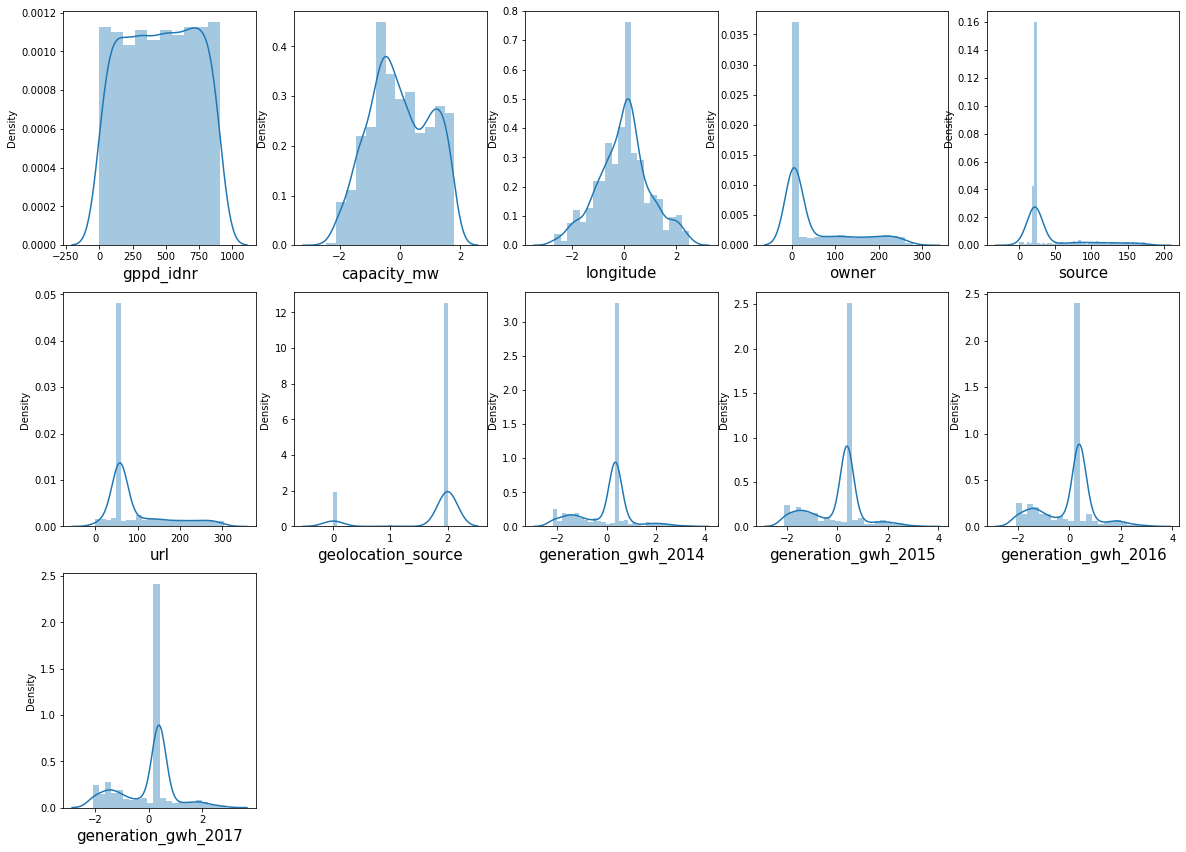

In [72]:
plt.figure(figsize =(20,25),facecolor ='white')
plotnum = 1

for col in X1:
    if plotnum<=11:
        plt.subplot(5,5,plotnum)
        sns.distplot(X1[col])
        plt.xlabel(col,fontsize = 15)
    plotnum+=1
plt.show()

### now almost skewness is clear, those are present, it is catgorical column..

## Data Standardization

In [73]:
#scale the data using StandardScalar for PCA

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_x = sc.fit_transform(X1)
scaled_x

array([[ 0.7597222 , -1.67800871, -0.94235793, ...,  0.38091413,
         0.38171863,  0.39584095],
       [ 0.23655959,  0.22709437, -0.52475701, ...,  0.38091413,
         0.38171863,  0.39584095],
       [ 1.50276475, -0.27103628, -2.37081489, ...,  0.38091413,
         0.38171863,  0.39584095],
       ...,
       [ 1.64682402, -0.50518453, -0.25139224, ...,  0.38091413,
         0.38171863,  0.39584095],
       [ 0.31238026,  0.11715111, -0.78291651, ...,  0.38091413,
         0.38171863,  0.39584095],
       [ 1.58995852, -0.74076992,  0.23206925, ...,  0.38091413,
         0.38171863,  0.39584095]])

In [74]:
# Checking for Multicollinearity using Variance inflation factor

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X1.columns
vif['vif'] = [variance_inflation_factor(scaled_x,i) for i in range(scaled_x.shape[1])]
vif

Features        vif
0             gppd_idnr   3.123916
1           capacity_mw   1.816772
2             longitude   1.294296
3                 owner   3.341188
4                source   2.762566
5                   url   1.966159
6    geolocation_source   1.989125
7   generation_gwh_2014   4.335525
8   generation_gwh_2015   8.175908
9   generation_gwh_2016  11.998502
10  generation_gwh_2017  11.759521
11  generation_gwh_2018  12.568663

### here VIF value is more then 10, then we remove this column.

In [75]:
X1 = X1.drop(['generation_gwh_2016','generation_gwh_2017','generation_gwh_2018'],axis = 1)

In [76]:
from sklearn.feature_selection import SelectKBest, f_classif

scaled_x = sc.fit_transform(X1)

## Finding the best Random State

In [77]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y_train, y_test = train_test_split(
    X1_resampled, y_resampled, test_size=0.2, random_state=42)

In [78]:
print("X1_train shape:", X1_train.shape)
print("X1_test shape:", X1_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X1_train shape: (1004, 12)
X1_test shape: (252, 12)
y_train shape: (1004,)
y_test shape: (252,)


## Data Modelling

### Logistic Regression

In [79]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)

In [80]:
log_reg.fit(X1_train, y_train)

LogisticRegression(random_state=42)

In [81]:
y_pred_log_reg = log_reg.predict(X1_test)

### KNN Classifier

In [82]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X1_train, y_train)

KNeighborsClassifier()

In [83]:
y_pred_knn = knn.predict(X1_test)

### Support Vector Classifier

In [84]:
from sklearn.svm import SVC
svc = SVC(random_state=42)
svc.fit(X1_train, y_train)

SVC(random_state=42)

In [85]:
y_pred_svc = svc.predict(X1_test)

### Naive Bayes Classifier

In [86]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X1_train, y_train)

GaussianNB()

In [87]:
y_pred_nb = nb.predict(X1_test)

### Decision Tree Classifier

In [88]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(random_state=42)
dec_tree.fit(X1_train, y_train)

DecisionTreeClassifier(random_state=42)

In [89]:
y_pred_dec_tree = dec_tree.predict(X1_test)

### Random Forest Classifier

In [90]:
from sklearn.ensemble import RandomForestClassifier
ran_for = RandomForestClassifier(random_state=42)
ran_for.fit(X1_train, y_train)

RandomForestClassifier(random_state=42)

In [91]:
y_pred_ran_for = ran_for.predict(X1_test)

## Model Evaluation

In [92]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
print('Logistic Regression:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_log_reg) * 100, 2))
print('F1 score:', round(f1_score(y_test, y_pred_log_reg) * 100, 2))



Logistic Regression:
Accuracy score: 91.67
F1 score: 90.91


In [93]:
print('KNN Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_knn) * 100, 2))
print('F1 score:', round(f1_score(y_test, y_pred_knn) * 100, 2))

KNN Classifier:
Accuracy score: 92.06
F1 score: 91.3


In [94]:
print('Support Vector Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_svc) * 100, 2))
print('F1 score:', round(f1_score(y_test, y_pred_svc) * 100, 2))

Support Vector Classifier:
Accuracy score: 82.94
F1 score: 82.87


In [95]:
print('Naive Bayes Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_nb) * 100, 2))
print('F1 score:', round(f1_score(y_test, y_pred_nb) * 100, 2))

Naive Bayes Classifier:
Accuracy score: 83.73
F1 score: 83.53


In [96]:
print('Decision Tree Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_dec_tree) * 100, 2))
print('F1 score:', round(f1_score(y_test, y_pred_dec_tree) * 100, 2))

Decision Tree Classifier:
Accuracy score: 98.02
F1 score: 97.85


In [97]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_ran_for) * 100, 2))
print('F1 score:', round(f1_score(y_test, y_pred_ran_for) * 100, 2))

Random Forest Classifier:
Accuracy score: 98.81
F1 score: 98.7


## Hyperparameter Tuning

In [98]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(X1) for X1 in np.linspace(start=40, stop=150, num=15)]
max_depth = [int(X1) for X1 in np.linspace(40, 150, num=15)]

In [99]:
param_dist = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
}

In [100]:
rf_tuned = RandomForestClassifier(random_state=42)
rf_cv = RandomizedSearchCV(
    estimator=rf_tuned, param_distributions=param_dist, cv=5, random_state=42)
rf_cv.fit(X1_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [40, 47, 55, 63, 71, 79,
                                                      87, 95, 102, 110, 118,
                                                      126, 134, 142, 150],
                                        'n_estimators': [40, 47, 55, 63, 71, 79,
                                                         87, 95, 102, 110, 118,
                                                         126, 134, 142, 150]},
                   random_state=42)

In [101]:
rf_cv.best_score_

0.9830696517412936

In [102]:
rf_cv.best_params_

{'n_estimators': 71, 'max_depth': 134}

In [103]:
rf_best = RandomForestClassifier(
    max_depth=102, n_estimators=40, random_state=42)

In [104]:
rf_best.fit(X1_train, y_train)

RandomForestClassifier(max_depth=102, n_estimators=40, random_state=42)

In [105]:
y_pred_rf_best = rf_best.predict(X1_test)

In [106]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_rf_best) * 100, 2))
print('F1 score:', round(f1_score(y_test, y_pred_rf_best) * 100, 2))

Random Forest Classifier:
Accuracy score: 98.81
F1 score: 98.7


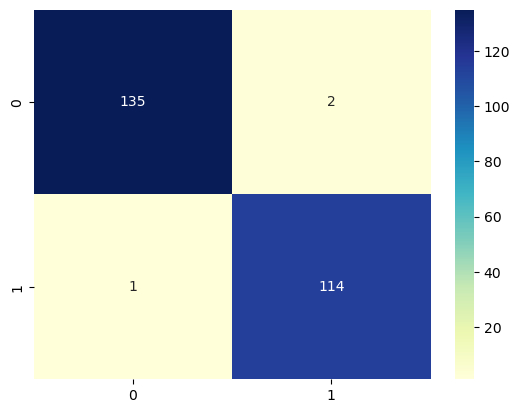

In [107]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_rf_best)
plt.style.use('default')
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.savefig('heatmap.png')
plt.show()

In [108]:
cm

array([[135,   2],
       [  1, 114]], dtype=int64)

In [109]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf_best))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       137
           1       0.98      0.99      0.99       115

    accuracy                           0.99       252
   macro avg       0.99      0.99      0.99       252
weighted avg       0.99      0.99      0.99       252



## Random forest classifier is the best model with 99% accuracy

## Save  Model

In [110]:
import joblib
joblib.dump(rf_best,"Best_m.pkl")

['Best_m.pkl']

In [111]:
mod = joblib.load("Best_m.pkl")
print(mod.predict(X1_test))

[1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0
 0 1 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1
 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0
 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 0 0
 1 1 1 0 1 1 0 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1
 0 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 0 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 1 1 1 1 1 1]


In [112]:
# Predicting some of the X_test results and matching it with true i.e. y_test values using Random Forest.

a = np.array(y_test)
predicted = np.array(mod.predict(X1_test))
df_con = pd.DataFrame({"orginal":a, "predicted":predicted}, index = range(len(a)))
df_con

orginal  predicted
0          1          1
1          0          0
2          0          0
3          0          0
4          1          1
..       ...        ...
247        1          1
248        1          1
249        1          1
250        1          1
251        1          1

[252 rows x 2 columns]

predicted and true value both are match ..

# Let's start the regression model for target "capacity_mw"

In [113]:
X2.head(6)

country country_long                      name   gppd_idnr primary_fuel  \
0     IND        India          ACME Solar Tower  WRI1020239        Solar   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         Coal   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         Wind   
3     IND        India               AGARTALA GT  IND0000001          Gas   
4     IND        India              AKALTARA TPP  IND0000002         Coal   
5     IND        India              AKRIMOTA LIG  IND0000003         Coal   

   latitude  longitude other_fuel1  commissioning_year                 owner  \
0   28.1839    73.2407         Oil         2011.000000           Solar Paces   
1   24.7663    74.6090         Oil         1997.091082  Ultratech Cement ltd   
2   21.9038    69.3732         Oil         1997.091082                   AES   
3   23.8712    91.3602         Oil         2004.000000           Acc Acc ltd   
4   21.9603    82.4091         Oil         2015.000000           Acc Acc ltd   
5   23.7689    68.6447         Oil         2005.000000           Acc Acc ltd   

                                 source  \
0  National Renewable Energy Laboratory   
1                  Ultratech Cement ltd   
2                                   CDM   
3         Central Electricity Authority   
4         Central Electricity Authority   
5         Central Electricity Authority   

                                                 url  \
0  http://www.nrel.gov/csp/solarpaces/project_det...   
1                    http://www.ultratechcement.com/   
2  https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...   
3                             http://www.cea.nic.in/   
4                             http://www.cea.nic.in/   
5                             http://www.cea.nic.in/   

                     geolocation_source  year_of_capacity_data  \
0  National Renewable Energy Laboratory                 2019.0   
1                                   WRI                 2019.0   
2                                   WRI                 2019.0   
3                                   WRI                 2019.0   
4                                   WRI                 2019.0   
5                                   WRI                 2019.0   

   generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0          2431.823590          2428.226946          2467.936859   
1          2431.823590          2428.226946          2467.936859   
2          2431.823590          2428.226946          2467.936859   
3           617.789264           843.747000           886.004428   
4          3035.550000          5916.370000          6243.000000   
5          1153.421000          1208.852000          1175.765000   

   generation_gwh_2017  generation_gwh_2018         generation_data_source  
0          2547.759305          2600.804099  Central Electricity Authority  
1          2547.759305          2600.804099  Central Electricity Authority  
2          2547.759305          2600.804099  Central Electricity Authority  
3           663.774500           626.239128  Central Electricity Authority  
4          5385.579736          7279.000000  Central Electricity Authority  
5          1147.913000           976.655000  Central Electricity Authority

In [114]:
Y2

capacity_mw
0            2.5
1           98.0
2           39.2
3          135.0
4         1800.0
..           ...
902       1600.0
903          3.0
904         25.5
905         80.0
906         16.5

[907 rows x 1 columns]

### firstly apply the encoding technique

In [115]:
for col in X2.columns:
    if X2[col].dtypes == 'object':
        encoder = LabelEncoder()
        X2[col] = encoder.fit_transform(X2[col])

In [116]:
X2.head(3)

country  country_long  name  gppd_idnr  primary_fuel  latitude  longitude  \
0        0             0     0        657             6   28.1839    73.2407   
1        0             0     1        519             1   24.7663    74.6090   
2        0             0     2        853             7   21.9038    69.3732   

   other_fuel1  commissioning_year  owner  source  url  geolocation_source  \
0            2         2011.000000    229     109  128                   1   
1            2         1997.091082    258     174  173                   2   
2            2         1997.091082      2      21  205                   2   

   year_of_capacity_data  generation_gwh_2014  generation_gwh_2015  \
0                 2019.0           2431.82359          2428.226946   
1                 2019.0           2431.82359          2428.226946   
2                 2019.0           2431.82359          2428.226946   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0          2467.936859          2547.759305          2600.804099   
1          2467.936859          2547.759305          2600.804099   
2          2467.936859          2547.759305          2600.804099   

   generation_data_source  
0                       0  
1                       0  
2                       0

In [117]:
X2.shape

(907, 20)

## Exploratory Data Analysis (EDA)

In [118]:
X2 = X2.drop(['country','country_long','generation_data_source'],axis=1)

#### these are use less data because it has only 0 values

In [119]:
# check for null values
X2.isnull().sum()

name                     0
gppd_idnr                0
primary_fuel             0
latitude                 0
longitude                0
other_fuel1              0
commissioning_year       0
owner                    0
source                   0
url                      0
geolocation_source       0
year_of_capacity_data    0
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018      0
dtype: int64

In [120]:
X2.skew()

name                      0.000000
gppd_idnr                 0.000000
primary_fuel              0.472251
latitude                 -0.149698
longitude                 1.141881
other_fuel1             -20.453120
commissioning_year       -1.399359
owner                     1.364406
source                    1.827373
url                       1.510537
geolocation_source       -2.159841
year_of_capacity_data     0.000000
generation_gwh_2014       5.035446
generation_gwh_2015       5.364134
generation_gwh_2016       5.068427
generation_gwh_2017       5.110952
generation_gwh_2018       4.937907
dtype: float64

## Data Visualization

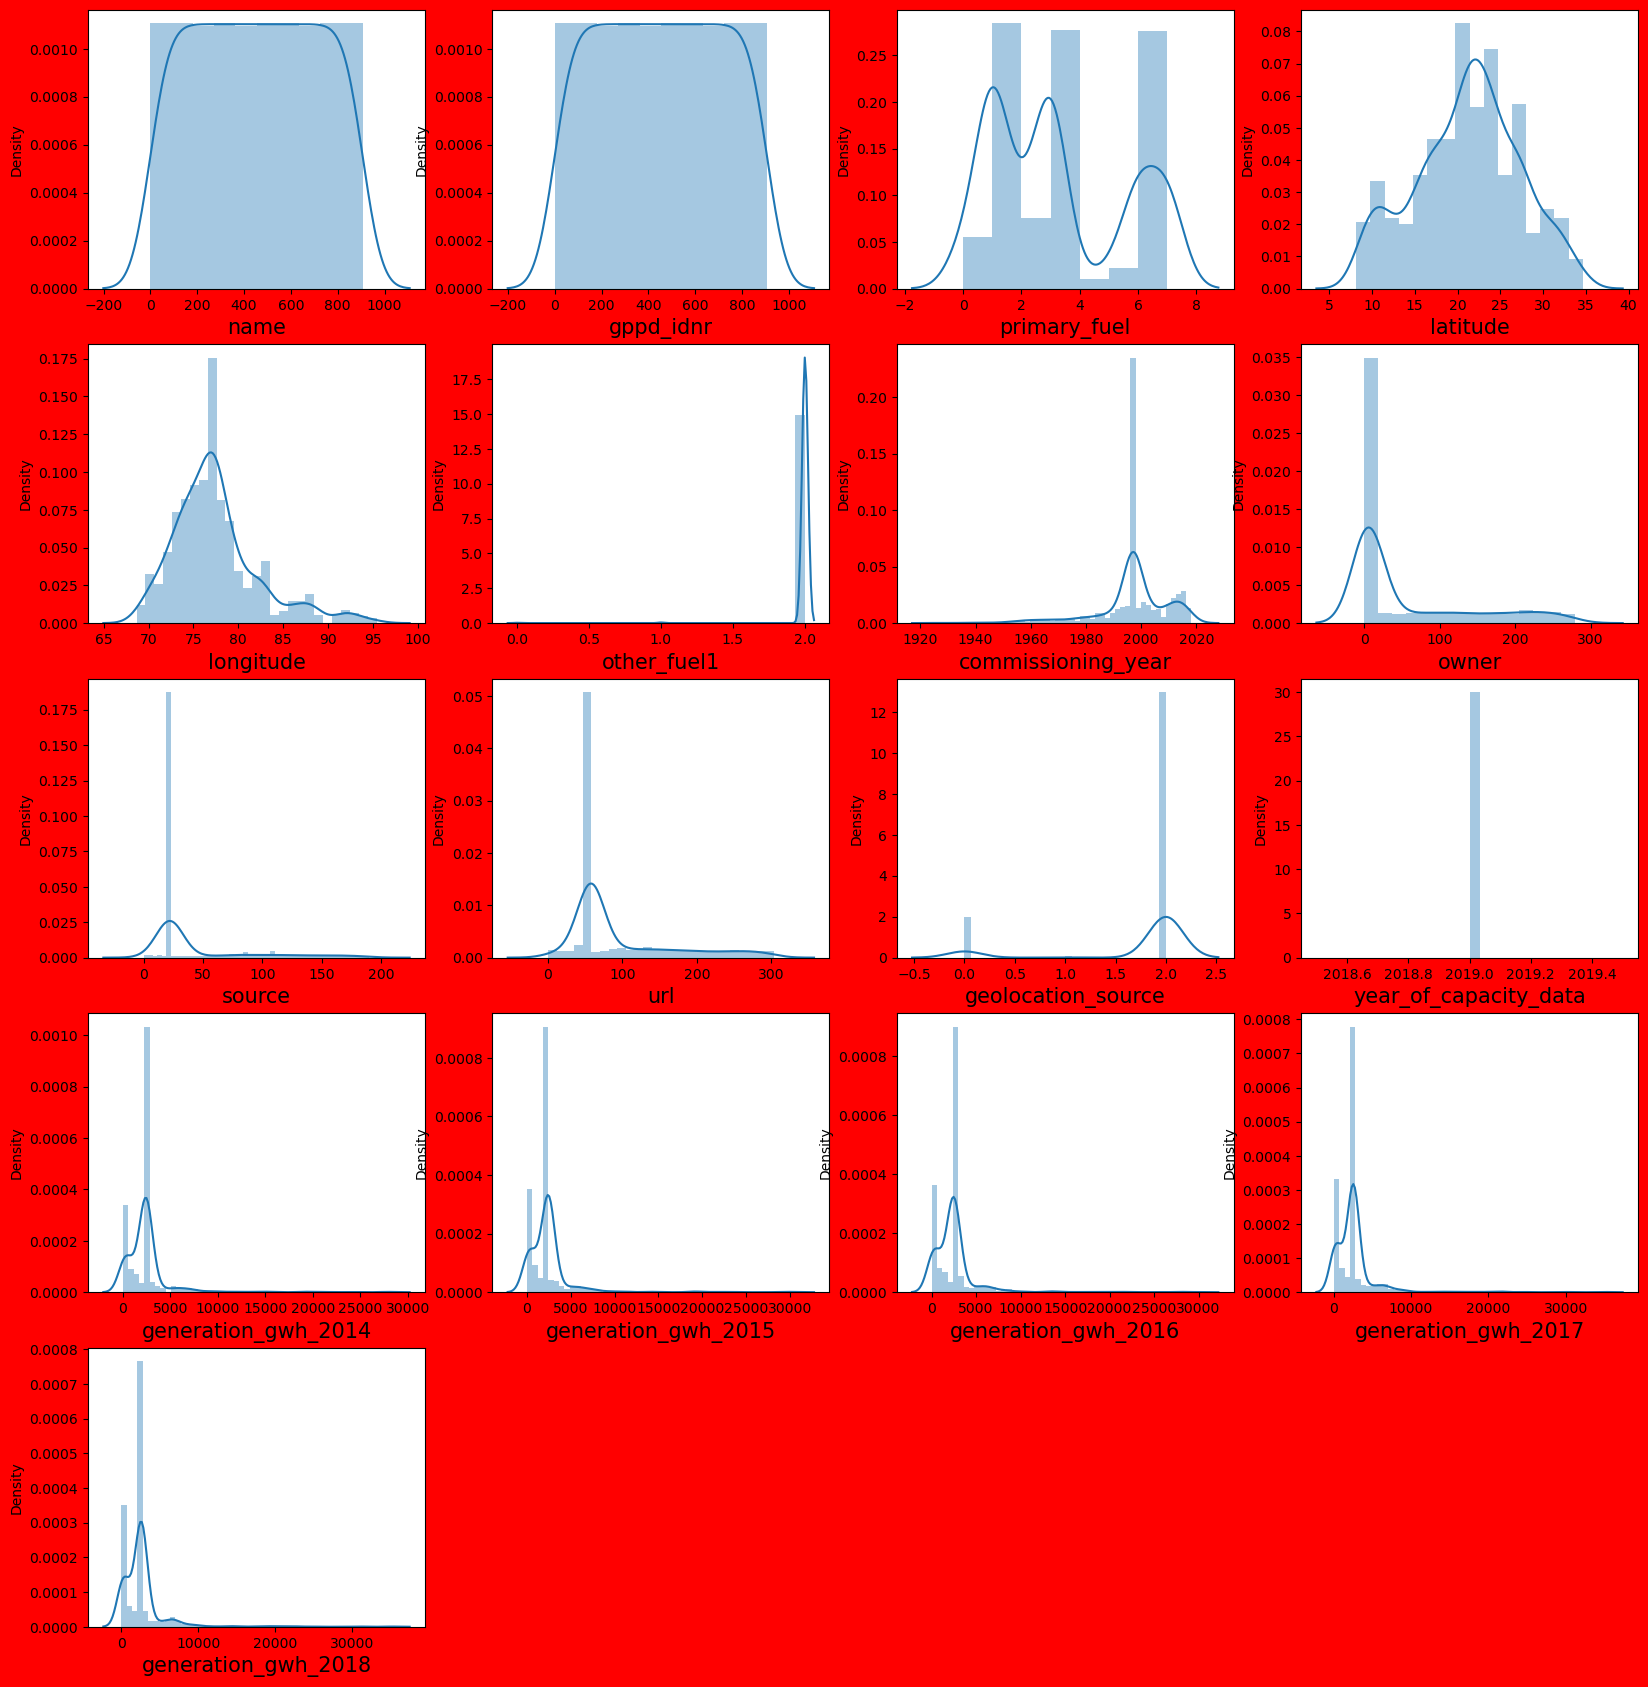

In [121]:
# Visualising data distribution for every column
plt.figure(figsize =(20,21),facecolor ='red')
plotnum = 1

for col in X2:
    if plotnum<=20:
        plt.subplot(5,4,plotnum)
        sns.distplot(X2[col])
        plt.xlabel(col,fontsize = 15)
    plotnum+=1
plt.show()

## Pair Plot

<Figure size 1500x1000 with 0 Axes>

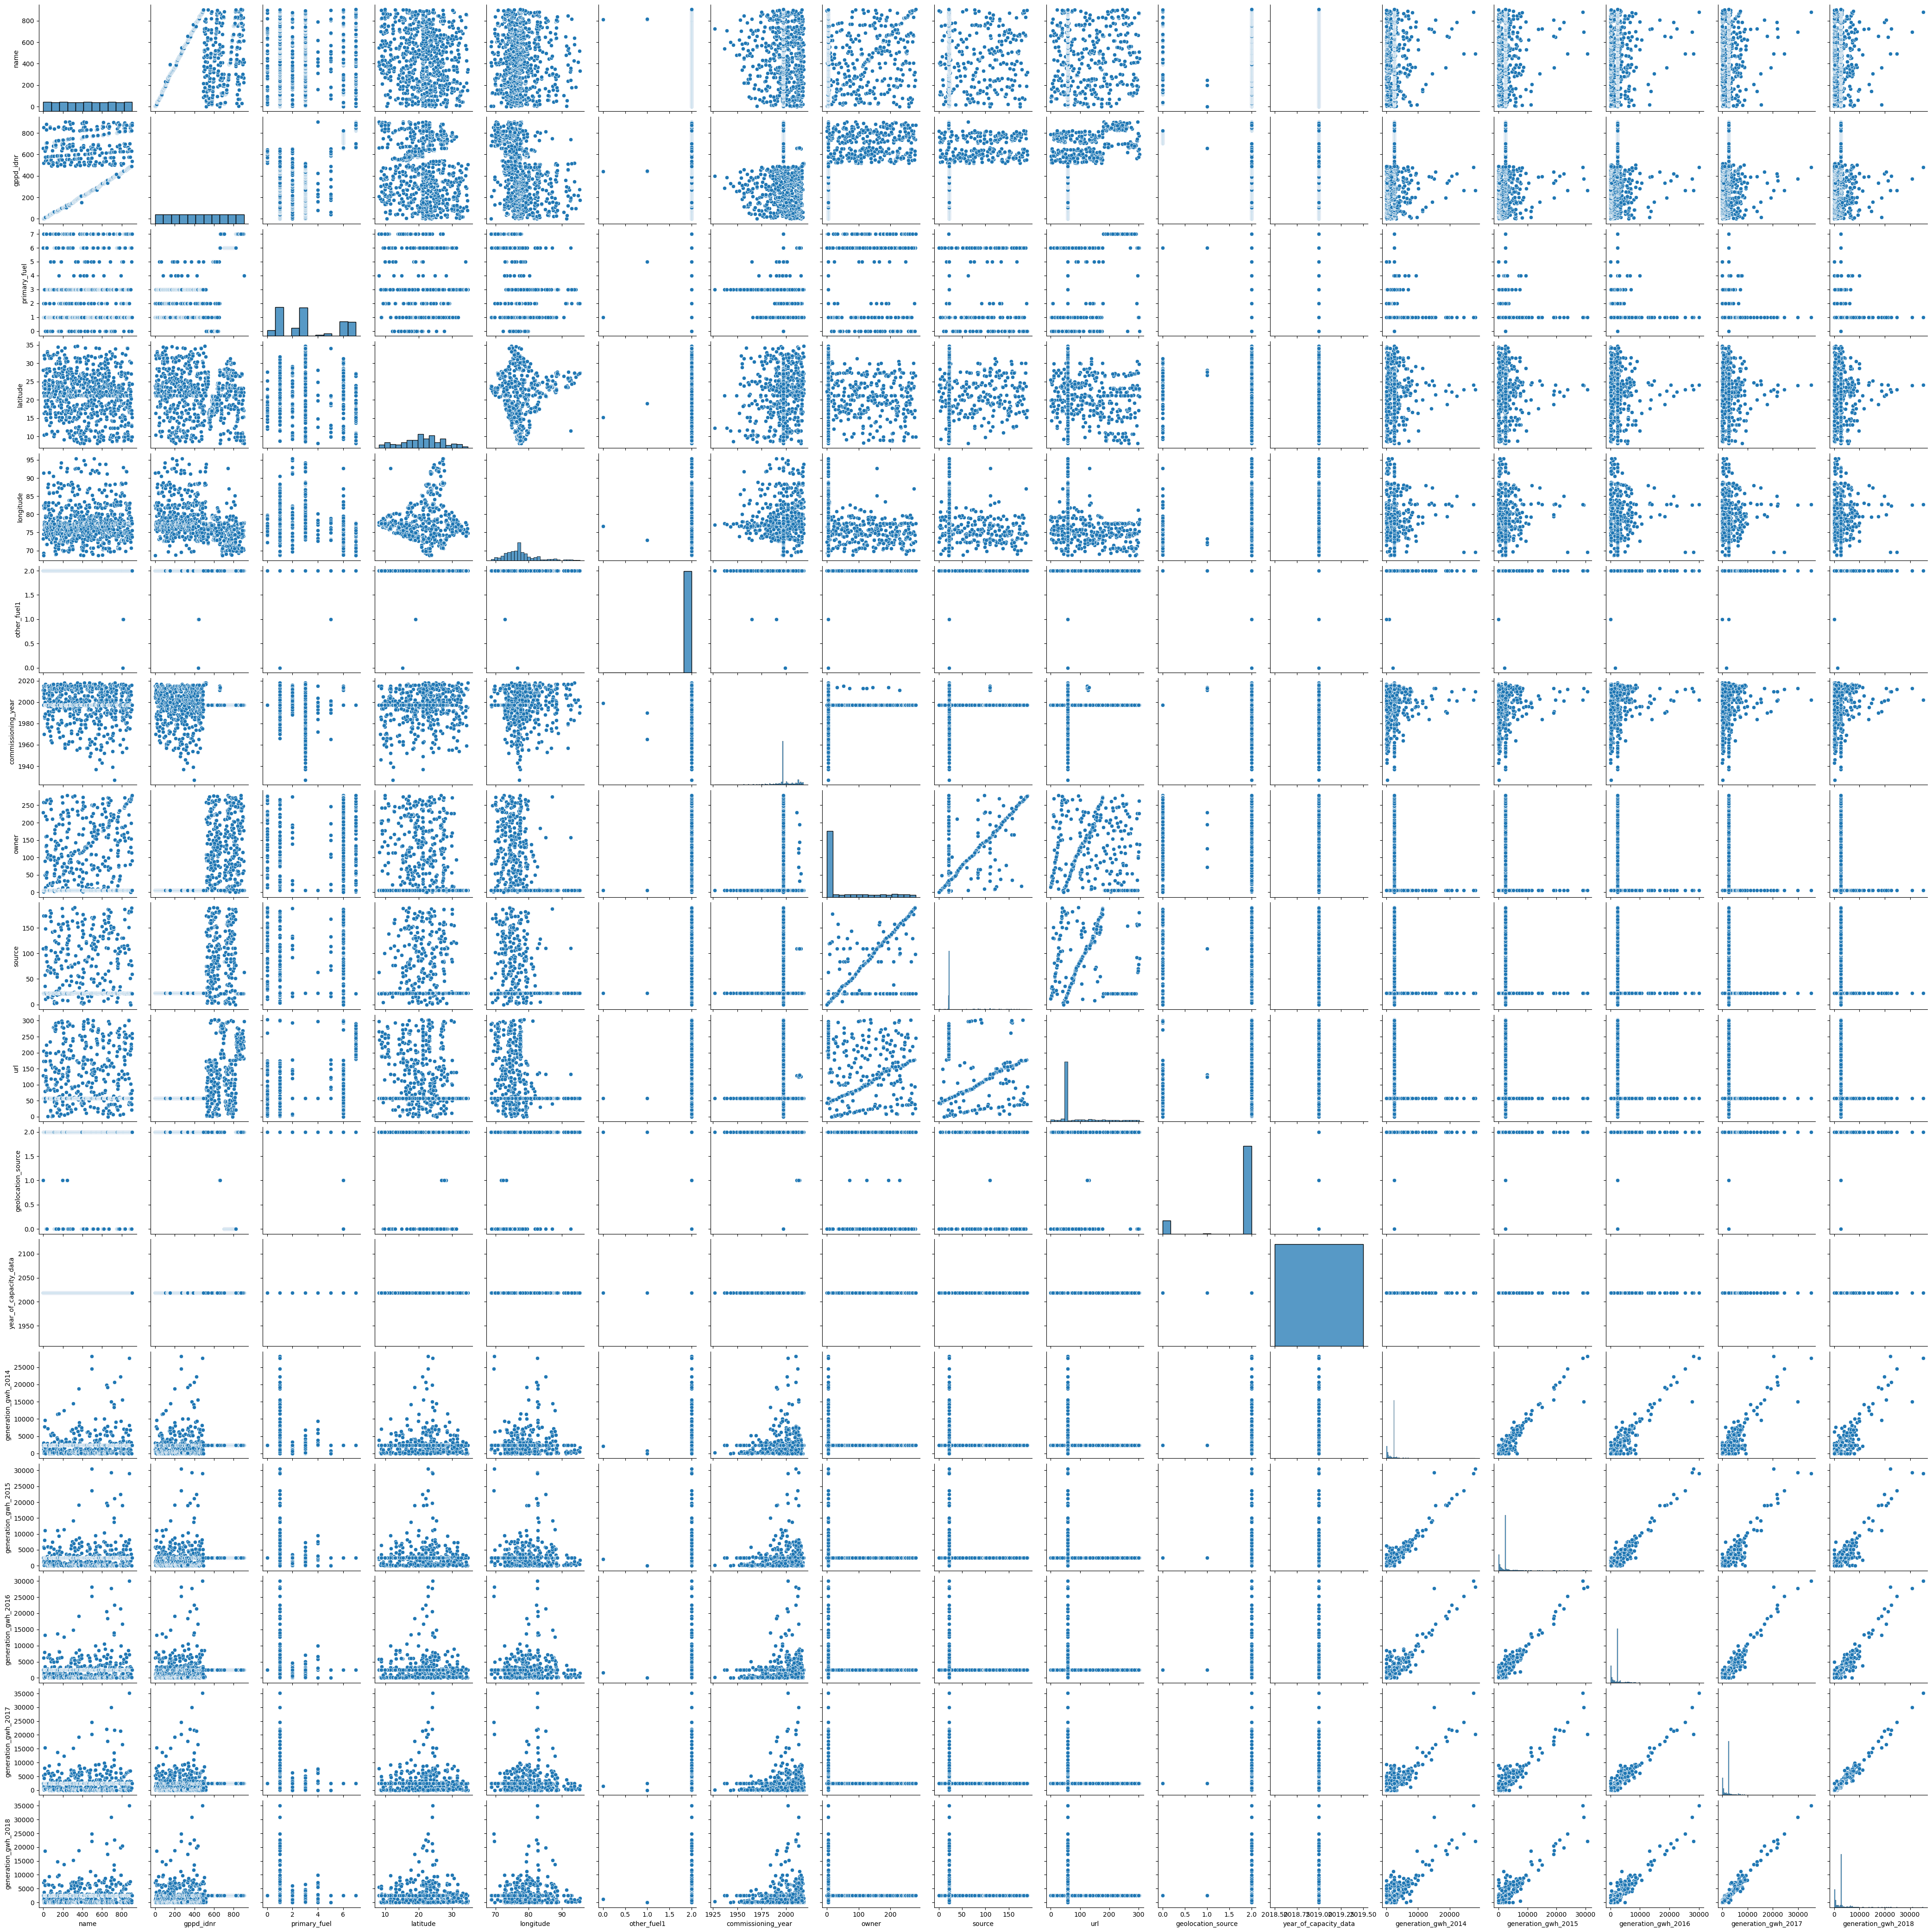

In [122]:
plt.figure(figsize=(15,10))
sns.pairplot(X2)
plt.show()

#### With the help of above pairplot we can see that no any particular columns have a linear relationship with capacity_mw. However all columns increase with respect to capacity_mw but their is no definite linear pattern into it.

## Correlation

### stripplot

In [123]:
Y2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   capacity_mw  907 non-null    float64
dtypes: float64(1)
memory usage: 7.2 KB


In [124]:
x = Y2.drop(columns=["capacity_mw"])
y = Y2['capacity_mw']

<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

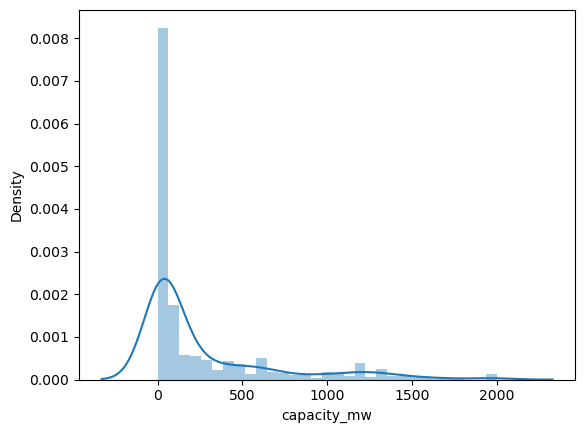

In [125]:
sns.distplot(df['capacity_mw'])

## Distribution Plot

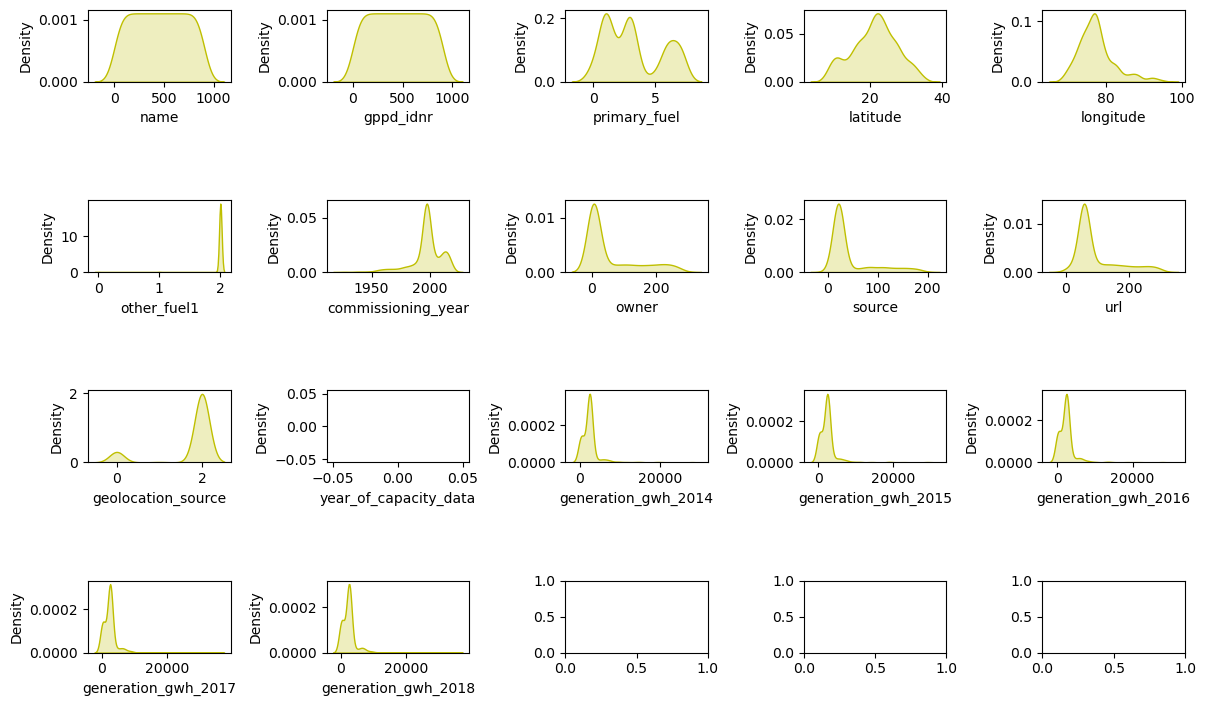

In [126]:
fig, ax = plt.subplots(ncols=5, nrows=4, figsize=(12,7))
index = 0
ax = ax.flatten()
for col, value in X2.items():
    sns.distplot(value, ax=ax[index], hist=False, color="y", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

#### my all column  distributed

In [127]:
X2.corrwith(Y2['capacity_mw']).sort_values()

primary_fuel            -0.380395
gppd_idnr               -0.335742
owner                   -0.311048
url                     -0.243830
source                  -0.242122
other_fuel1              0.003105
latitude                 0.050984
name                     0.060240
longitude                0.195882
geolocation_source       0.204865
commissioning_year       0.274292
generation_gwh_2014      0.694350
generation_gwh_2015      0.711190
generation_gwh_2016      0.742221
generation_gwh_2017      0.757585
generation_gwh_2018      0.773456
year_of_capacity_data         NaN
dtype: float64

#### we can see there is no correlation with 'other_fuel1','latitude','name','year_of_capacity_data', so we can drop thip column.

In [128]:
X2 = X2.drop([ 'other_fuel1','latitude','name','year_of_capacity_data'],axis=1)

## Heat map

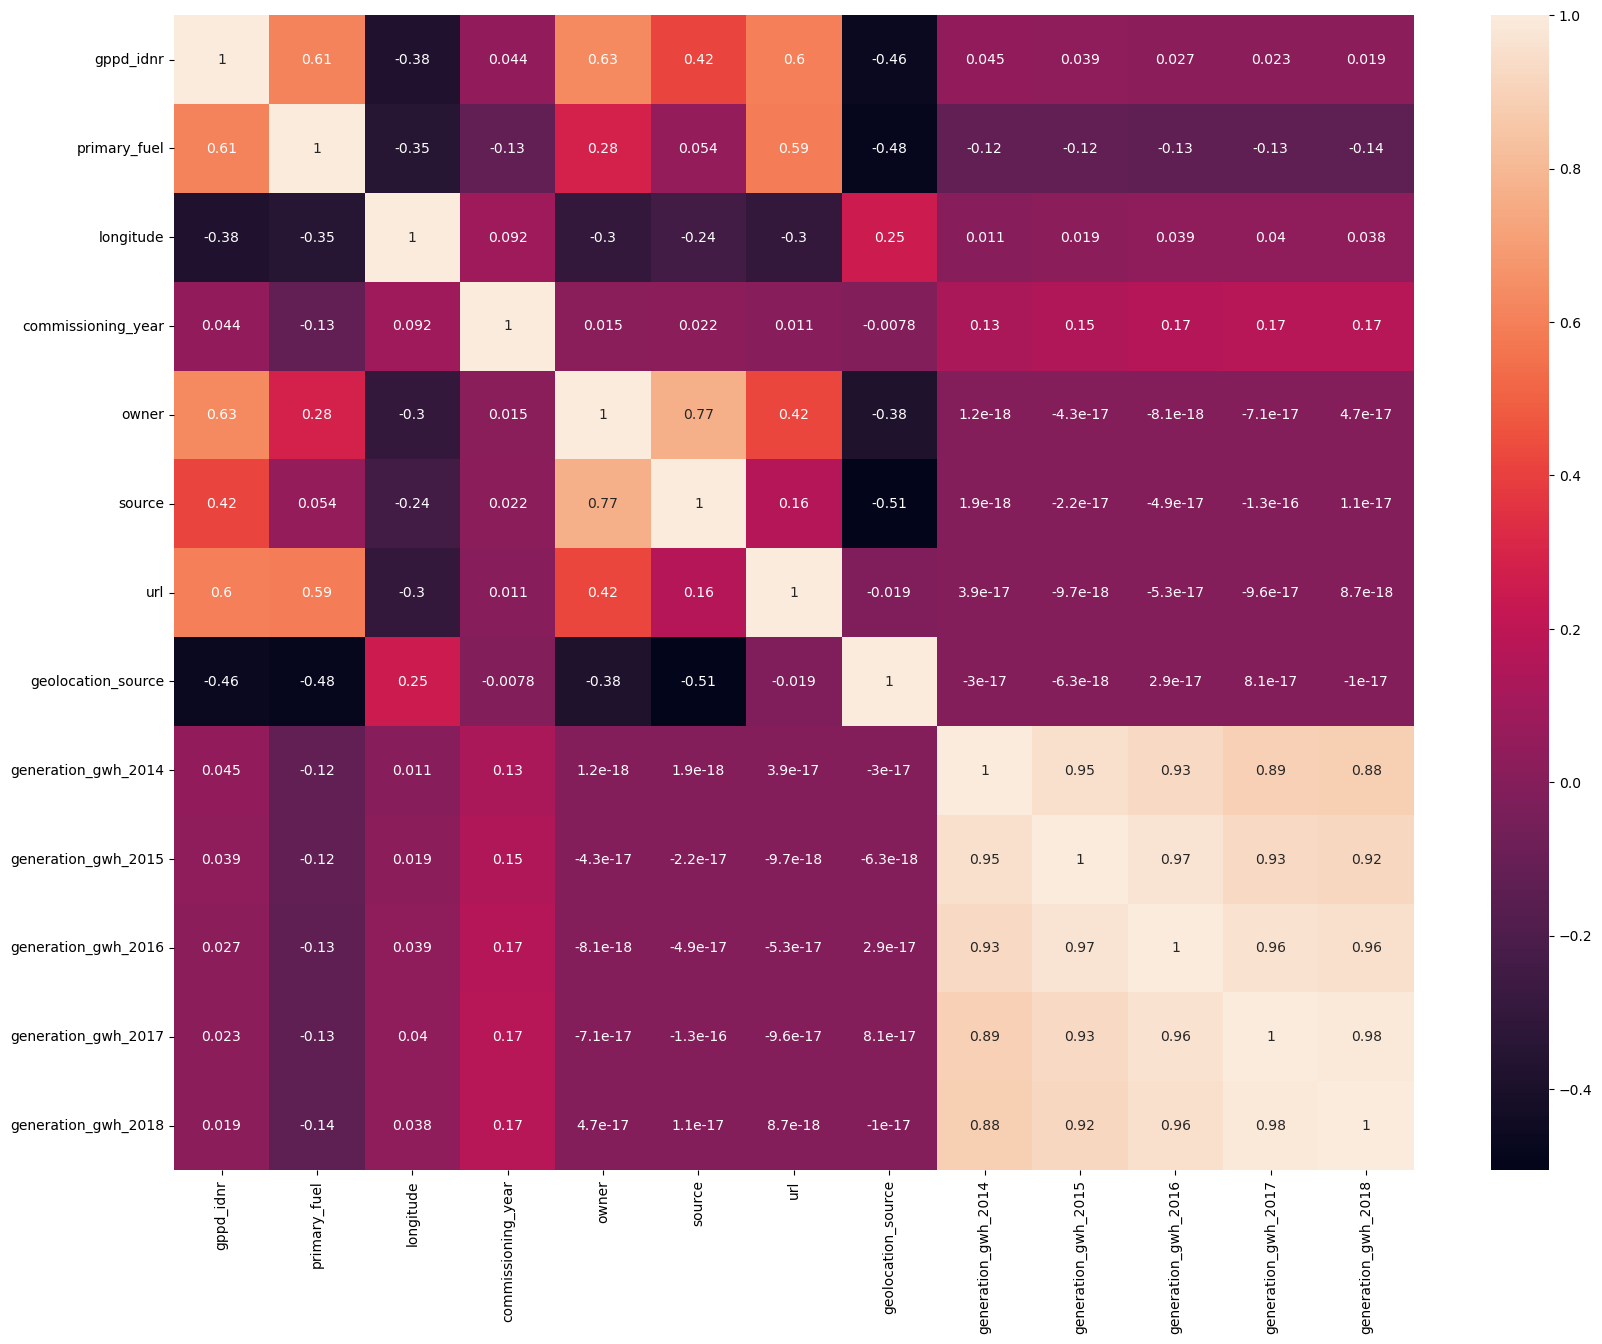

In [129]:
# plotting heat map
plt.figure(figsize = (20,15))
sns.heatmap(X2.corr(),annot = True)
plt.show()

#### see this graph some data are highly correlated to each other..so we should apply VIF

### checking the skewness and outliers

In [130]:
X2.skew()

gppd_idnr              0.000000
primary_fuel           0.472251
longitude              1.141881
commissioning_year    -1.399359
owner                  1.364406
source                 1.827373
url                    1.510537
geolocation_source    -2.159841
generation_gwh_2014    5.035446
generation_gwh_2015    5.364134
generation_gwh_2016    5.068427
generation_gwh_2017    5.110952
generation_gwh_2018    4.937907
dtype: float64

### Box plot

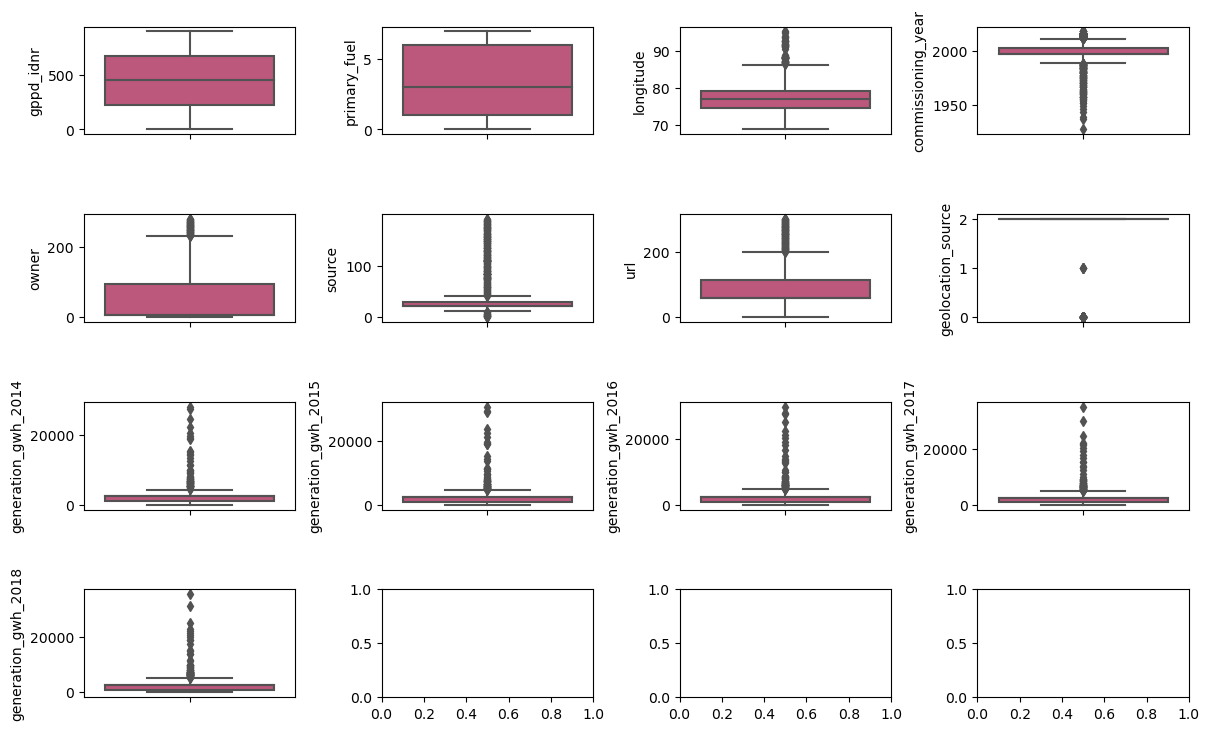

In [131]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(12,7))
index = 0
ax = ax.flatten()
for col, value in X2.items():
    sns.boxplot(y=col, data=X2, ax=ax[index], palette="plasma")
    index += 1
plt.tight_layout(pad=0.2, w_pad=0.9, h_pad=5.0)
plt.show()

### there are many outliers are present in this dataset.

## Z score method to remove outliers

In [132]:
features =['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','commissioning_year','longitude']

In [133]:
#w= X2.copy()

#from scipy.stats import zscore

#zscor = zscore(w)
#zabs = np.abs(zscor)
#df = w[(zabs <3).all(axis=1)] #taking threshold value as 3
#print(df.shape)

#print(w.shape)

In [134]:
#X2.skew()

In [135]:
#df.skew()

In [136]:
# Reducing the skewness further
#X2 = df.copy()
#feat = ['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','commissioning_year','longitude']

#skewdf = X2[feat].copy()

#Trying log transform method

#for col in skewdf:
    #skewdf[col] = np.log(skewdf[col])
#skewdf.skew()

In [137]:
# Trying power transform method

#from sklearn.preprocessing import PowerTransformer

#powtrans = PowerTransformer(method = 'yeo-johnson', standardize = True)
#df1 = X2[feat].copy()
#df1.skew()

In [138]:
#transformed = powtrans.fit_transform(df1)

#transformed = pd.DataFrame(transformed, columns =df1.columns)
#transformed.skew()

In [139]:
#skewdf.skew()

### Comparing outputs of Log Transformer and Power Transformer method, it is determined that Power Transformer gives better result.

In [140]:
#transformed.index = X2.index
#X2[feat] = transformed[feat]
#x = Y2.drop(columns = ['capacity_mw'])
#y = Y2['capacity_mw']
#X2.skew()

In [141]:
#plt.figure(figsize =(20,25),facecolor ='white')
#plotnum = 1

#for col in X2:
    #if plotnum<=13:
     #   plt.subplot(4,4,plotnum)
      #  sns.distplot(X2[col])
       # plt.xlabel(col,fontsize = 15)
    #plotnum+=1
#plt.show()

### now my all column are normalized distribute except catogorical column.

### i am appling z score method but it give data loss and due to this problem i am not removing outliers.because due to this problem my model does not split into  train and test.

## Data Standirazation

In [142]:
#scale the data using StandardScalar for PCA

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_x = sc.fit_transform(X2)
scaled_x

array([[ 7.79136890e-01,  1.22568762e+00, -8.78279731e-01, ...,
         0.00000000e+00, -1.55741196e-16,  1.50124402e-16],
       [ 2.52073700e-01, -9.67877242e-01, -5.93788441e-01, ...,
         0.00000000e+00, -1.55741196e-16,  1.50124402e-16],
       [ 1.52771939e+00,  1.66440059e+00, -1.68239437e+00, ...,
         0.00000000e+00, -1.55741196e-16,  1.50124402e-16],
       ...,
       [ 1.67285273e+00,  1.66440059e+00, -3.91673420e-01, ...,
         0.00000000e+00, -1.55741196e-16,  1.50124402e-16],
       [ 3.28459669e-01, -9.67877242e-01, -7.72866383e-01, ...,
         0.00000000e+00, -1.55741196e-16,  1.50124402e-16],
       [ 1.61556326e+00,  1.66440059e+00,  2.47270171e-03, ...,
         0.00000000e+00, -1.55741196e-16,  1.50124402e-16]])

In [143]:
# Checking for Multicollinearity using Variance inflation factor

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X2.columns
vif['vif'] = [variance_inflation_factor(scaled_x,i) for i in range(scaled_x.shape[1])]
vif

Features        vif
0             gppd_idnr   2.939399
1          primary_fuel   3.732526
2             longitude   1.245327
3    commissioning_year   1.098807
4                 owner   3.763003
5                source   3.944953
6                   url   2.831380
7    geolocation_source   3.080587
8   generation_gwh_2014  11.144093
9   generation_gwh_2015  26.250248
10  generation_gwh_2016  33.491105
11  generation_gwh_2017  36.928753
12  generation_gwh_2018  30.462672

#### here two column which have vif>10 , let's drop  this column

In [144]:
X2 = X2.drop(['generation_gwh_2017','generation_gwh_2018'],axis = 1)

## Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [151]:
X = Y2.drop('capacity_mw', axis=1)
Y = Y2['capacity_mw']

In [152]:
scaler = StandardScaler()
X2 = pd.DataFrame(scaler.fit_transform(X2), columns=X2.columns)
X2 # Displaying all the features after applying scaling technique to avoid bias output

gppd_idnr  primary_fuel  longitude  commissioning_year     owner  \
0     0.779137      1.225688  -0.878280        1.069162e+00  2.095328   
1     0.252074     -0.967877  -0.593788       -3.701868e-15  2.446913   
2     1.527719      1.664401  -1.682394       -3.701868e-15 -0.656734   
3    -1.730142     -0.529164   2.889052        5.310801e-01 -0.620363   
4    -1.726323     -0.967877   1.027976        1.376637e+00 -0.620363   
..         ...           ...        ...                 ...       ...   
902   0.145133     -0.967877  -0.022477        1.453505e+00 -0.620363   
903   1.409321      1.225688   0.145644       -3.701868e-15  0.701112   
904   1.672853      1.664401  -0.391673       -3.701868e-15 -0.620363   
905   0.328460     -0.967877  -0.772866       -3.701868e-15  0.422268   
906   1.615563      1.664401   0.002473       -3.701868e-15  2.701509   

       source       url  geolocation_source  generation_gwh_2014  \
0    1.460215  0.476673           -1.083349         1.550414e-16   
1    2.917019  1.116401            0.394241         1.550414e-16   
2   -0.512075  1.571318            0.394241         1.550414e-16   
3   -0.489662 -0.518459            0.394241        -6.809773e-01   
4   -0.489662 -0.518459            0.394241         2.266352e-01   
..        ...       ...                 ...                  ...   
902 -0.489662 -0.518459            0.394241         1.550414e-16   
903  0.743019 -1.030242           -2.560940         1.550414e-16   
904 -0.512075  2.353208            0.394241         1.550414e-16   
905  0.339596 -0.177271            0.394241         1.550414e-16   
906 -0.512075  2.139965            0.394241         1.550414e-16   

     generation_gwh_2015  generation_gwh_2016  
0           7.833988e-18        -7.050589e-17  
1           7.833988e-18        -7.050589e-17  
2           7.833988e-18        -7.050589e-17  
3          -5.544458e-01        -5.499881e-01  
4           1.220581e+00         1.312471e+00  
..                   ...                  ...  
902        -8.493441e-01        -7.768097e-01  
903         7.833988e-18        -7.050589e-17  
904         7.833988e-18        -7.050589e-17  
905         7.833988e-18        -7.050589e-17  
906         7.833988e-18        -7.050589e-17  

[907 rows x 11 columns]

### Even though all our feature columns were of float data type I was unhappy with the decimal place differences and was worried that it might make my model biased. Therefore I am using the Standard Scaler method to ensure all my feature columns have been standardized.                    
Note: Trying to retain all the original data therefore not treating the outliers to ensure I do not have any data loss for my model creation.

## Creating the training and testing data sets

In [146]:
X2.columns

Index(['gppd_idnr', 'primary_fuel', 'longitude', 'commissioning_year', 'owner',
       'source', 'url', 'geolocation_source', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016'],
      dtype='object')

In [147]:
y

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
902    1600.0
903       3.0
904      25.5
905      80.0
906      16.5
Name: capacity_mw, Length: 907, dtype: float64

## Creating the training and testing data sets

In [154]:
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=21)

In [155]:
def reg(model, X2, y):
    X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=21)
    
    # Training the model
    model.fit(X2_train, y_train)
    
    # Predicting Y_test
    pred = model.predict(X2_test)
    
    # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X2, y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

In [156]:
# Linear Regression Model

model=LinearRegression()
reg(model, X2, y)

RMSE Score is: 340.8096988997326
R2 Score is: 60.00277796529715
Cross Validation Score: 70.07070164115333
R2 Score - Cross Validation Score is -10.067923675856186


In [157]:
# Support Vector Regression

model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
reg(model, X2, y)

RMSE Score is: 480.9112470094891
R2 Score is: 20.359164834456333
Cross Validation Score: 17.75957494082142
R2 Score - Cross Validation Score is 2.5995898936349136


In [158]:
# Decision Tree Regressor

model=DecisionTreeRegressor(criterion="poisson", random_state=111)
reg(model, X2, y)

RMSE Score is: 384.9611475795995
R2 Score is: 48.968334986231014
Cross Validation Score: 64.59348277934794
R2 Score - Cross Validation Score is -15.625147793116923


In [159]:
# Random Forest Regressor

model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, X2, y)

RMSE Score is: 312.0482007368239
R2 Score is: 66.46878399901479
Cross Validation Score: 71.20024803996594
R2 Score - Cross Validation Score is -4.731464040951153


In [160]:
# K Neighbors Regressor

KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
reg(model, X2, y)

RMSE Score is: 313.1240404744371
R2 Score is: 66.23717618610195
Cross Validation Score: 71.29498412127658
R2 Score - Cross Validation Score is -5.057807935174637


In [161]:
# Gradient Boosting Regressor

model=GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
reg(model, X2, y)

RMSE Score is: 295.3842034843398
R2 Score is: 69.9544284008087
Cross Validation Score: 63.17770112830063
R2 Score - Cross Validation Score is 6.776727272508062


In [162]:
# Ada Boost Regressor

model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
reg(model, X2, y)

RMSE Score is: 480.15376088441946
R2 Score is: 20.609852741764534
Cross Validation Score: 35.08280757086041
R2 Score - Cross Validation Score is -14.472954829095876


In [163]:
# Extra Trees Regressor

model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
reg(model, X2, y)

RMSE Score is: 277.4135684882028
R2 Score is: 73.4990565413558
Cross Validation Score: 83.32952439134182
R2 Score - Cross Validation Score is -9.830467849986022


## after evaluate all model , we can see for my data  Extra Trees Regressor is the best model for hypertuning

## Hyperparameter tuning

In [167]:
# Choosing ExtraTreesRegressor

fmod_param = {'n_estimators' : [40, 80, 120, 160],
              'n_jobs' : [1,3,4,5],
              'max_features' : ["sqrt", "log2"],
              'random_state' : [21, 42, 104, 111]
             }

In [168]:
GSCV = GridSearchCV(ExtraTreesRegressor(), fmod_param, cv=5)

In [169]:
GSCV.fit(X2_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'max_features': ['sqrt', 'log2'],
                         'n_estimators': [40, 80, 120, 160],
                         'n_jobs': [1, 3, 4, 5],
                         'random_state': [21, 42, 104, 111]})

In [170]:
GSCV.best_params_

{'max_features': 'sqrt', 'n_estimators': 80, 'n_jobs': 1, 'random_state': 42}

In [172]:
Final_Model = ExtraTreesRegressor(max_features ='sqrt', n_estimators=80, n_jobs=1, random_state=42)
Classifier = Final_Model.fit(X2_train, y_train)
fmod_pred = Final_Model.predict(X2_test)
fmod_r2 = r2_score(y_test, fmod_pred, multioutput='variance_weighted')*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: 72.76015342956433


# Saving the best model

In [173]:
filename = "FinalModel.pkl"
joblib.dump(Final_Model, filename)

['FinalModel.pkl']

### we can see capacity mw is high in 2018.

## here i present 2 type of problem one regression and one classification.